# Capstone Project Phase-4

In this phase we will create a table with all types of crime all together and then we will divide the whole dataset in 3 different Clusters as below::

1. Sensitive Areas

2. Moderate Area

3. Peaceful Area

In [2]:
import sqlite3
import pandas as pd
import csv
import pandas as pd
import numpy as np

import seaborn as sns 
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

# Creating Crime Database for all types of crime.

In [3]:
# Creating Connection
connection = sqlite3.connect('crimereport.db')

# Creating Cursor
cursor = connection.cursor()

# table defination
create_table = 'CREATE TABLE Crime(State text , District text , Year int , Murder int , Murder_Attempt int , Rape int , Kidnapping int , Dacoity int , Robbery int , Burglary int , Theft int , Riots int , Cheating int , Dowry_deaths int , Women_assualt int , Husband_cruelty int , other_crime int ,Total_crime int)'

# Creating table in new database
cursor.execute(create_table)

# Opening CSV file.
file = open('Crime_report.csv')

# reading file 
content = csv.reader(file)

# inserting  records
insert_record = 'INSERT into Crime(State, District, Year, Murder, Murder_Attempt, Rape, Kidnapping, Dacoity, Robbery, Burglary, Theft, Riots, Cheating, Dowry_deaths, Women_assualt, Husband_cruelty, other_crime,Total_crime) VALUES(?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?)'

# Importing files
cursor.executemany(insert_record , content)

# Creating uploaded data 
select_all = 'SELECT * FROM Crime'
rows = cursor.execute(select_all).fetchall()
for r in rows:
    print(r)
    
connection.commit()

('State', 'District', 'Year', 'Murder', 'Murder_Attempt', 'Rape', 'Kidnapping', 'Dacoity', 'Robbery', 'Burglary', 'Theft', 'Riots', 'Cheating', 'Dowry_deaths', 'Women_assualt', 'Husband_cruelty', 'other_crime', 'Total_crime')
('ANDHRA PRADESH', 'ADILABAD', 2001, 101, 60, 50, 46, 9, 41, 198, 199, 78, 104, 16, 34, 175, 1518, 2629)
('ANDHRA PRADESH', 'ANANTAPUR', 2001, 151, 125, 23, 53, 8, 16, 191, 366, 168, 65, 7, 24, 154, 754, 2105)
('ANDHRA PRADESH', 'CHITTOOR', 2001, 101, 57, 27, 59, 4, 14, 237, 723, 156, 209, 14, 83, 186, 1262, 3132)
('ANDHRA PRADESH', 'CUDDAPAH', 2001, 80, 53, 20, 25, 1, 4, 98, 173, 164, 37, 17, 38, 57, 1181, 1948)
('ANDHRA PRADESH', 'EAST GODAVARI', 2001, 82, 67, 23, 49, 4, 25, 437, 1021, 70, 220, 12, 58, 247, 2313, 4628)
('ANDHRA PRADESH', 'GUNTAKAL RLY.', 2001, 3, 1, 0, 0, 5, 2, 0, 162, 1, 0, 0, 0, 0, 104, 278)
('ANDHRA PRADESH', 'GUNTUR', 2001, 182, 88, 54, 82, 16, 59, 338, 1122, 244, 300, 7, 129, 378, 2426, 5425)
('ANDHRA PRADESH', 'HYDERABAD CITY', 2001, 111, 

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Now we will divide the above data into 3 different cluster using SQL command.

# Sensitive Area

In [21]:
rows = cursor.execute("SELECT State,District,Murder,Rape,Kidnapping,Robbery,Cheating,Husband_cruelty FROM Crime WHERE Total_Crime >=1500 AND Total_Crime <=4000 ")
rows.fetchall()

[('ANDHRA PRADESH', 'ADILABAD', 101, 50, 46, 41, 104, 175),
 ('ANDHRA PRADESH', 'ANANTAPUR', 151, 23, 53, 16, 65, 154),
 ('ANDHRA PRADESH', 'CHITTOOR', 101, 27, 59, 14, 209, 186),
 ('ANDHRA PRADESH', 'CUDDAPAH', 80, 20, 25, 4, 37, 57),
 ('ANDHRA PRADESH', 'KARIMNAGAR', 162, 56, 67, 50, 243, 224),
 ('ANDHRA PRADESH', 'KHAMMAM', 93, 47, 41, 13, 130, 172),
 ('ANDHRA PRADESH', 'KRISHNA', 65, 37, 36, 15, 104, 265),
 ('ANDHRA PRADESH', 'KURNOOL', 133, 29, 47, 22, 126, 92),
 ('ANDHRA PRADESH', 'MAHABOOBNAGAR', 157, 59, 42, 27, 84, 69),
 ('ANDHRA PRADESH', 'MEDAK', 101, 35, 26, 26, 87, 192),
 ('ANDHRA PRADESH', 'NALGONDA', 122, 35, 27, 28, 122, 214),
 ('ANDHRA PRADESH', 'NELLORE', 89, 46, 90, 16, 177, 287),
 ('ANDHRA PRADESH', 'NIZAMABAD', 106, 21, 38, 22, 122, 228),
 ('ANDHRA PRADESH', 'PRAKASHAM', 102, 19, 31, 14, 88, 119),
 ('ANDHRA PRADESH', 'SRIKAKULAM', 38, 8, 12, 4, 53, 108),
 ('ANDHRA PRADESH', 'VISAKHAPATNAM', 22, 13, 13, 5, 192, 204),
 ('ARUNACHAL PRADESH', 'TOTAL', 83, 33, 83, 84, 3

Now we will convert the data of sensitive area into dataframe .

In [23]:
sql_query = pd.read_sql_query("SELECT State,District,Murder,Rape,Kidnapping,Robbery,Cheating,Husband_cruelty,Total_crime FROM Crime WHERE Total_Crime >=1500 AND Total_Crime <= 4000 ",connection)

# Converting sql into DataFrame
df = pd.DataFrame(sql_query ,columns = ['State','District','Murder','Rape','Kidnapping','Robbery','Cheating','Husband_cruelty','Total_crime'])
print(df)

                State    District  Murder  Rape  Kidnapping  Robbery  \
0      ANDHRA PRADESH    ADILABAD     101    50          46       41   
1      ANDHRA PRADESH   ANANTAPUR     151    23          53       16   
2      ANDHRA PRADESH    CHITTOOR     101    27          59       14   
3      ANDHRA PRADESH    CUDDAPAH      80    20          25        4   
4      ANDHRA PRADESH  KARIMNAGAR     162    56          67       50   
...               ...         ...     ...   ...         ...      ...   
32805        DELHI UT     CENTRAL      35    31         180       47   
32806        DELHI UT       NORTH      25    14         153       45   
32807        DELHI UT  SOUTH-WEST      47    87         399       47   
32808      PUDUCHERRY  PUDUCHERRY      24     7          17       13   
32809      PUDUCHERRY       TOTAL      29    13          19       16   

       Cheating  Husband_cruelty  Total_crime  
0           104              175         2629  
1            65              154       

In [25]:
df

State    District  Murder  Rape  Kidnapping  Robbery  \
0      ANDHRA PRADESH    ADILABAD     101    50          46       41   
1      ANDHRA PRADESH   ANANTAPUR     151    23          53       16   
2      ANDHRA PRADESH    CHITTOOR     101    27          59       14   
3      ANDHRA PRADESH    CUDDAPAH      80    20          25        4   
4      ANDHRA PRADESH  KARIMNAGAR     162    56          67       50   
...               ...         ...     ...   ...         ...      ...   
32805        DELHI UT     CENTRAL      35    31         180       47   
32806        DELHI UT       NORTH      25    14         153       45   
32807        DELHI UT  SOUTH-WEST      47    87         399       47   
32808      PUDUCHERRY  PUDUCHERRY      24     7          17       13   
32809      PUDUCHERRY       TOTAL      29    13          19       16   

       Cheating  Husband_cruelty  Total_crime  
0           104              175         2629  
1            65              154         2105  
2           209              186         3132  
3            37               57         1948  
4           243              224         3613  
...         ...              ...          ...  
32805       189               57         2723  
32806       127               70         2521  
32807       189              207         3838  
32808        75                5         2579  
32809        90                6         3128  

[32810 rows x 9 columns]

# Performing EDA

In [26]:
df.shape

(32810, 9)

In [27]:
df.columns

Index(['State', 'District', 'Murder', 'Rape', 'Kidnapping', 'Robbery',
       'Cheating', 'Husband_cruelty', 'Total_crime'],
      dtype='object')

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32810 entries, 0 to 32809
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   State            32810 non-null  object
 1   District         32810 non-null  object
 2   Murder           32810 non-null  int64 
 3   Rape             32810 non-null  int64 
 4   Kidnapping       32810 non-null  int64 
 5   Robbery          32810 non-null  int64 
 6   Cheating         32810 non-null  int64 
 7   Husband_cruelty  32810 non-null  int64 
 8   Total_crime      32810 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 2.3+ MB


In [29]:
df.dtypes

State              object
District           object
Murder              int64
Rape                int64
Kidnapping          int64
Robbery             int64
Cheating            int64
Husband_cruelty     int64
Total_crime         int64
dtype: object

In the above dataset we can see there are 2 type of data (object and integer.)

In [30]:
# checking null values

df.isnull().sum()

State              0
District           0
Murder             0
Rape               0
Kidnapping         0
Robbery            0
Cheating           0
Husband_cruelty    0
Total_crime        0
dtype: int64

<AxesSubplot:>

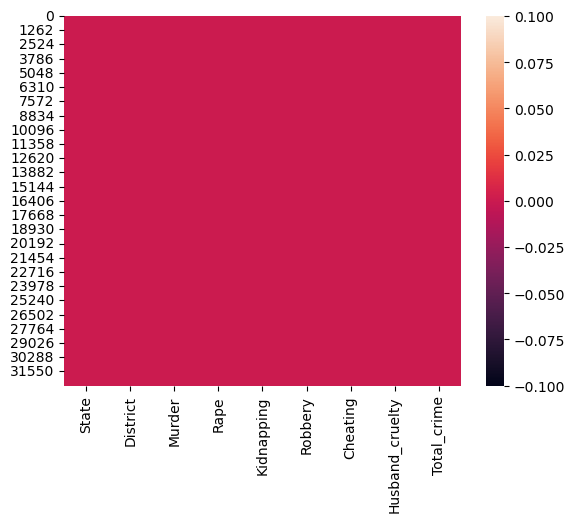

In [31]:
# checking heatmap for null values 

sns.heatmap(df.isnull())

as per above data and heatmap there is no null value in the df datatset .

In [33]:
df.describe()

Murder          Rape    Kidnapping       Robbery      Cheating  \
count  32810.000000  32810.000000  32810.000000  32810.000000  32810.000000   
mean      59.723865     34.733618     48.990552     32.477598     91.369095   
std       39.457567     28.530966     42.088041     27.010590     93.772149   
min        3.000000      0.000000      0.000000      0.000000      0.000000   
25%       33.000000     15.000000     20.000000     14.000000     31.000000   
50%       49.000000     28.000000     36.000000     25.000000     60.000000   
75%       76.000000     46.000000     65.000000     43.000000    120.000000   
max      324.000000    369.000000    399.000000    423.000000    793.000000   

       Husband_cruelty   Total_crime  
count     32810.000000  32810.000000  
mean        121.430357   2536.400488  
std         114.613621    700.154360  
min           0.000000   1500.000000  
25%          43.000000   1919.000000  
50%          85.000000   2448.000000  
75%         164.000000   3109.000000  
max         945.000000   3999.000000

In the above plot we can see the statistical information of numerical dataset.

As per above we can see the difference between mean and median.

From the above plot we can see that there is difference between 75% and max  , means there is outlier present in the dataset.

In [34]:
# Checking correlation

df.corr()

Murder      Rape  Kidnapping   Robbery  Cheating  \
Murder           1.000000  0.267451    0.444960  0.398529  0.050723   
Rape             0.267451  1.000000    0.292855  0.072807  0.002581   
Kidnapping       0.444960  0.292855    1.000000  0.190470  0.241139   
Robbery          0.398529  0.072807    0.190470  1.000000  0.013951   
Cheating         0.050723  0.002581    0.241139  0.013951  1.000000   
Husband_cruelty  0.192667  0.355776    0.313924  0.013564  0.414129   
Total_crime      0.168351  0.111242    0.193038  0.198407  0.293242   

                 Husband_cruelty  Total_crime  
Murder                  0.192667     0.168351  
Rape                    0.355776     0.111242  
Kidnapping              0.313924     0.193038  
Robbery                 0.013564     0.198407  
Cheating                0.414129     0.293242  
Husband_cruelty         1.000000     0.314981  
Total_crime             0.314981     1.000000

<AxesSubplot:>

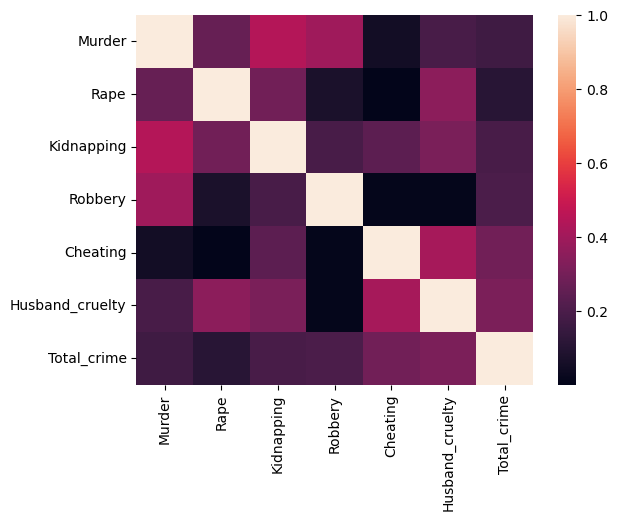

In [35]:
# checking heatmap for correlation

sns.heatmap(df.corr())

# Data Visualization

<AxesSubplot:xlabel='Murder', ylabel='Density'>

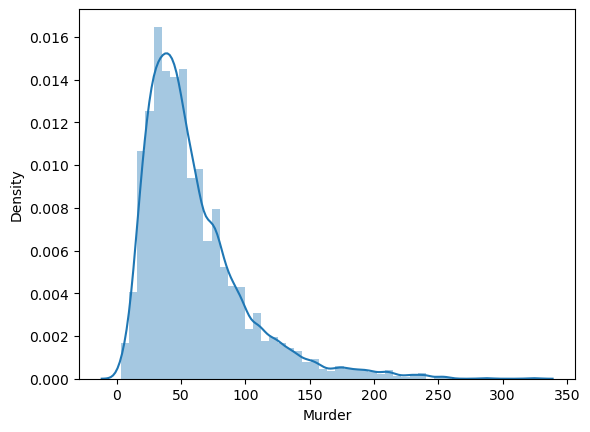

In [38]:
sns.distplot(df['Murder'])

From the above plot we can see that maximum murder is done in between 0 to 100.

<AxesSubplot:xlabel='Rape', ylabel='count'>

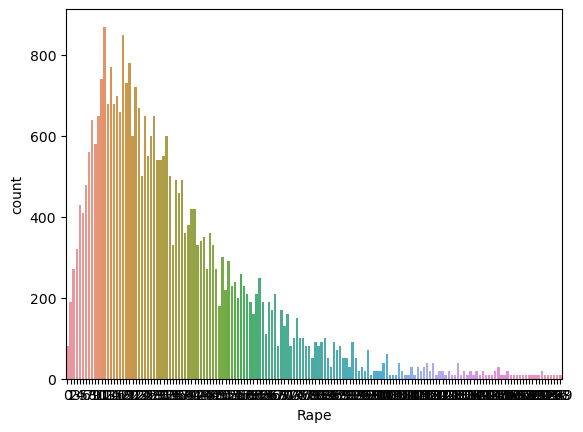

In [39]:
sns.countplot(df['Rape'])

In the Rape plot we see this graph is in downward side.

<AxesSubplot:xlabel='Kidnapping', ylabel='Count'>

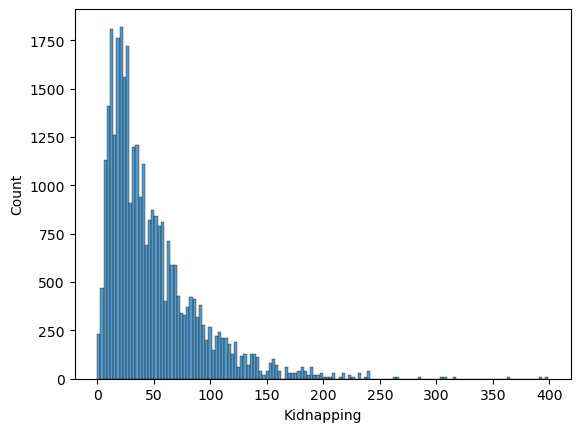

In [40]:
sns.histplot(df['Kidnapping'])

In this plot highest kidnapping is done between 0 to 100.

<AxesSubplot:xlabel='Cheating'>

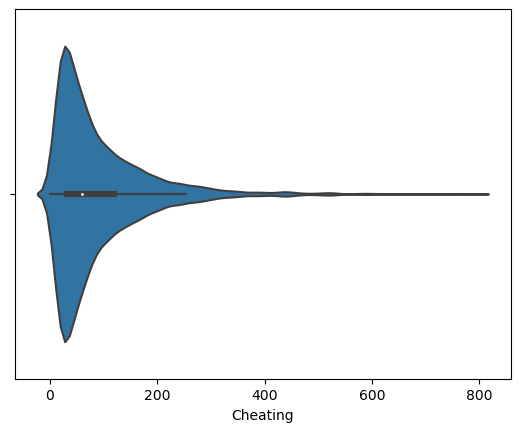

In [41]:
sns.violinplot(df['Cheating'])

As per above plot we can see maximum of cheating is done between 0 to 200.

<AxesSubplot:xlabel='Robbery', ylabel='count'>

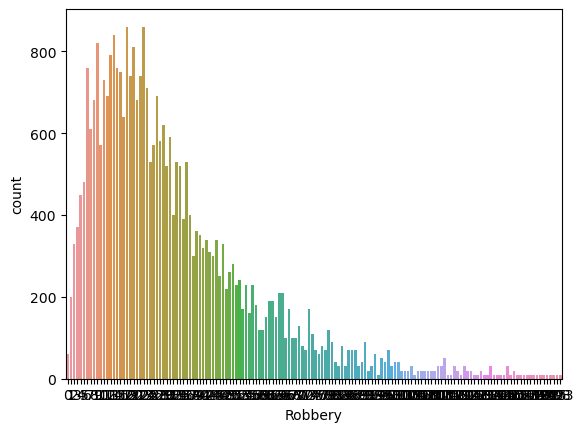

In [42]:
sns.countplot(df['Robbery'])

As per Robbery plot we can see that maximum robbery is done at some areas.

<AxesSubplot:xlabel='Husband_cruelty', ylabel='Count'>

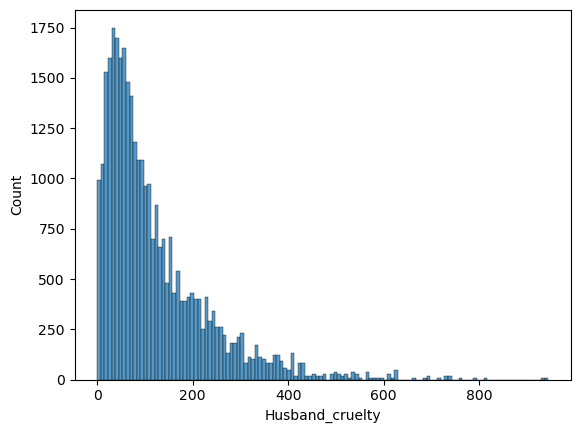

In [43]:
sns.histplot(df['Husband_cruelty'])

As per the plot Husband_cruelty is highest between 0 to 200.

<AxesSubplot:xlabel='Total_crime'>

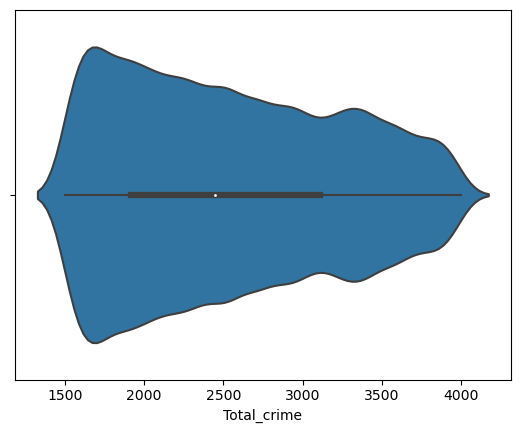

In [44]:
sns.violinplot(df['Total_crime'])

In this above plot we see that crime is done all over the states.

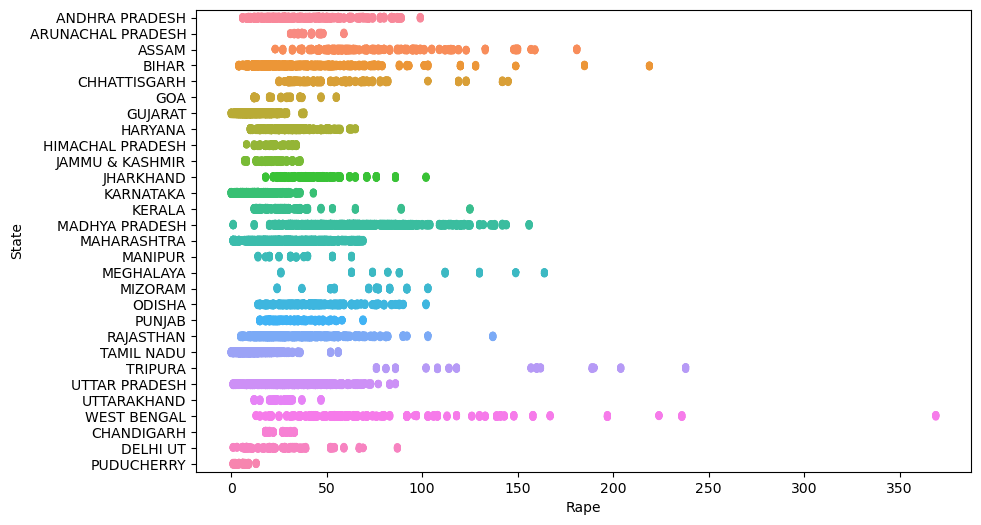

In [46]:
# compairision between State and Rape

plt.figure(figsize=(10,6))
sns.stripplot(x='Rape',y='State',data=df)
plt.show()

In the above plot we see that Maximum of Rape in state West Bengal.

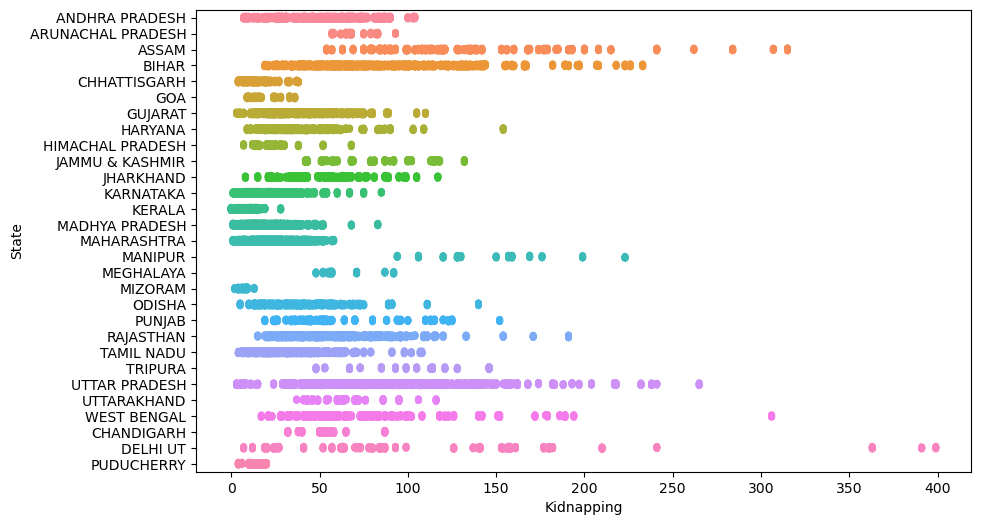

In [48]:
# compairision between State and Kidnapping

plt.figure(figsize=(10,6))
sns.stripplot(x='Kidnapping',y='State',data=df)
plt.show()

As per above plot highest Kidnapping case is in Bihar and Uttar Pradesh.

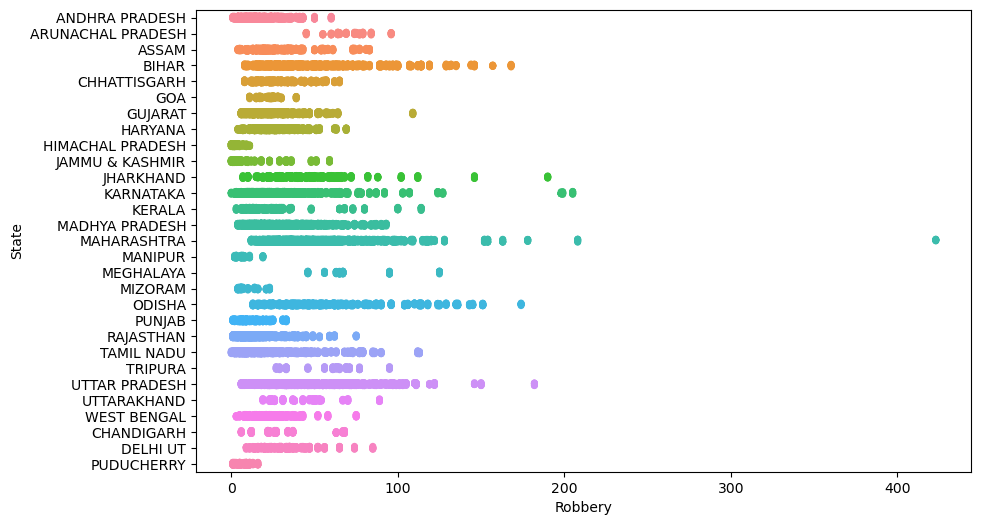

In [49]:
# compairision between State and Kidnapping

plt.figure(figsize=(10,6))
sns.stripplot(x='Robbery',y='State',data=df)
plt.show()

In this plot we see that there are few states where Robbery count is high.

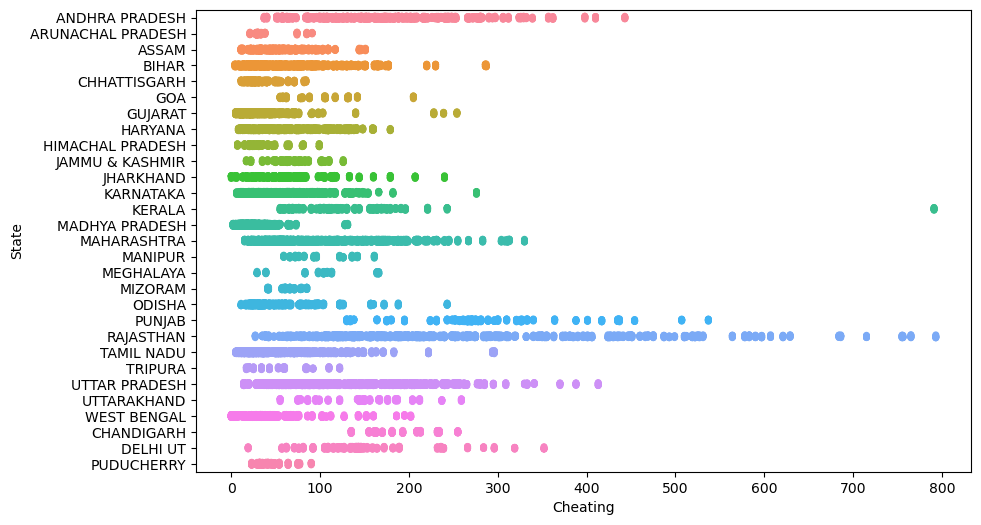

In [50]:
# compairision between State and Cheating

plt.figure(figsize=(10,6))
sns.stripplot(x='Cheating',y='State',data=df)
plt.show()

In this plot we see that Rajasthan is highest rate of Cheating.

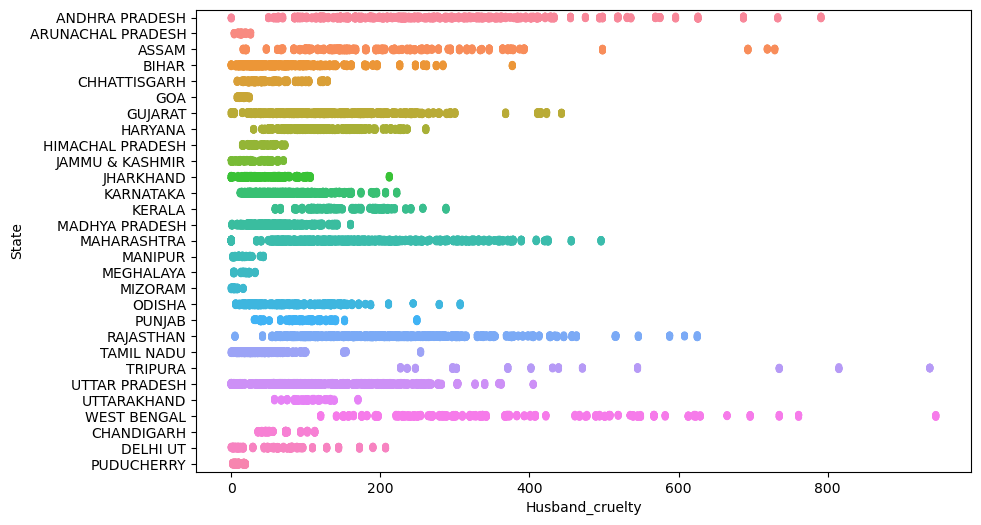

In [52]:
# compairision between State and Husband_cruelty

plt.figure(figsize=(10,6))
sns.stripplot(x='Husband_cruelty',y='State',data=df)
plt.show()

In the Above we see that Husband_cruelty cases is very common in multiple states.

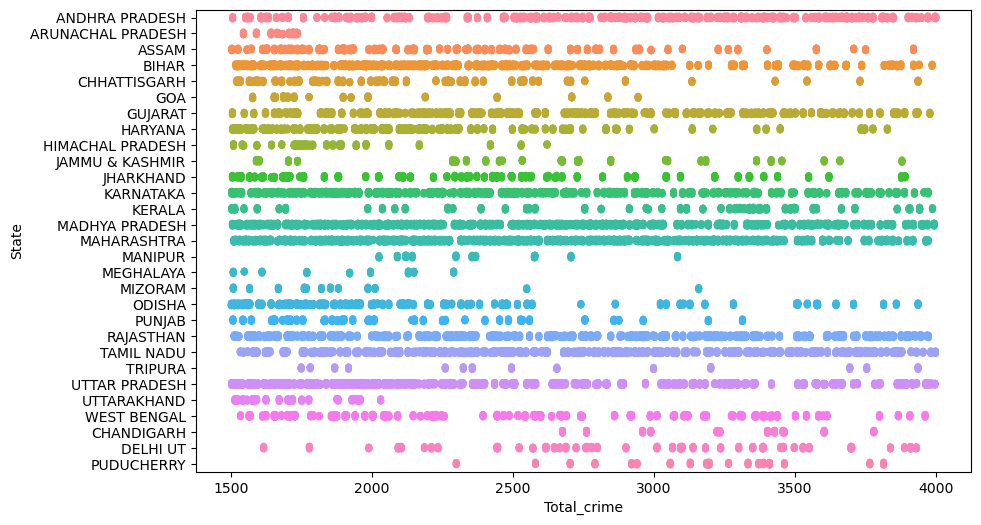

In [53]:
# compairision between State and Total_crime

plt.figure(figsize=(10,6))
sns.stripplot(x='Total_crime',y='State',data=df)
plt.show()

As per above plot we can see that maximum of plot is done is Tamilnadu , UttarPradesh ,Rajasthan , Maharashtra , Madhya Pradesh etc.

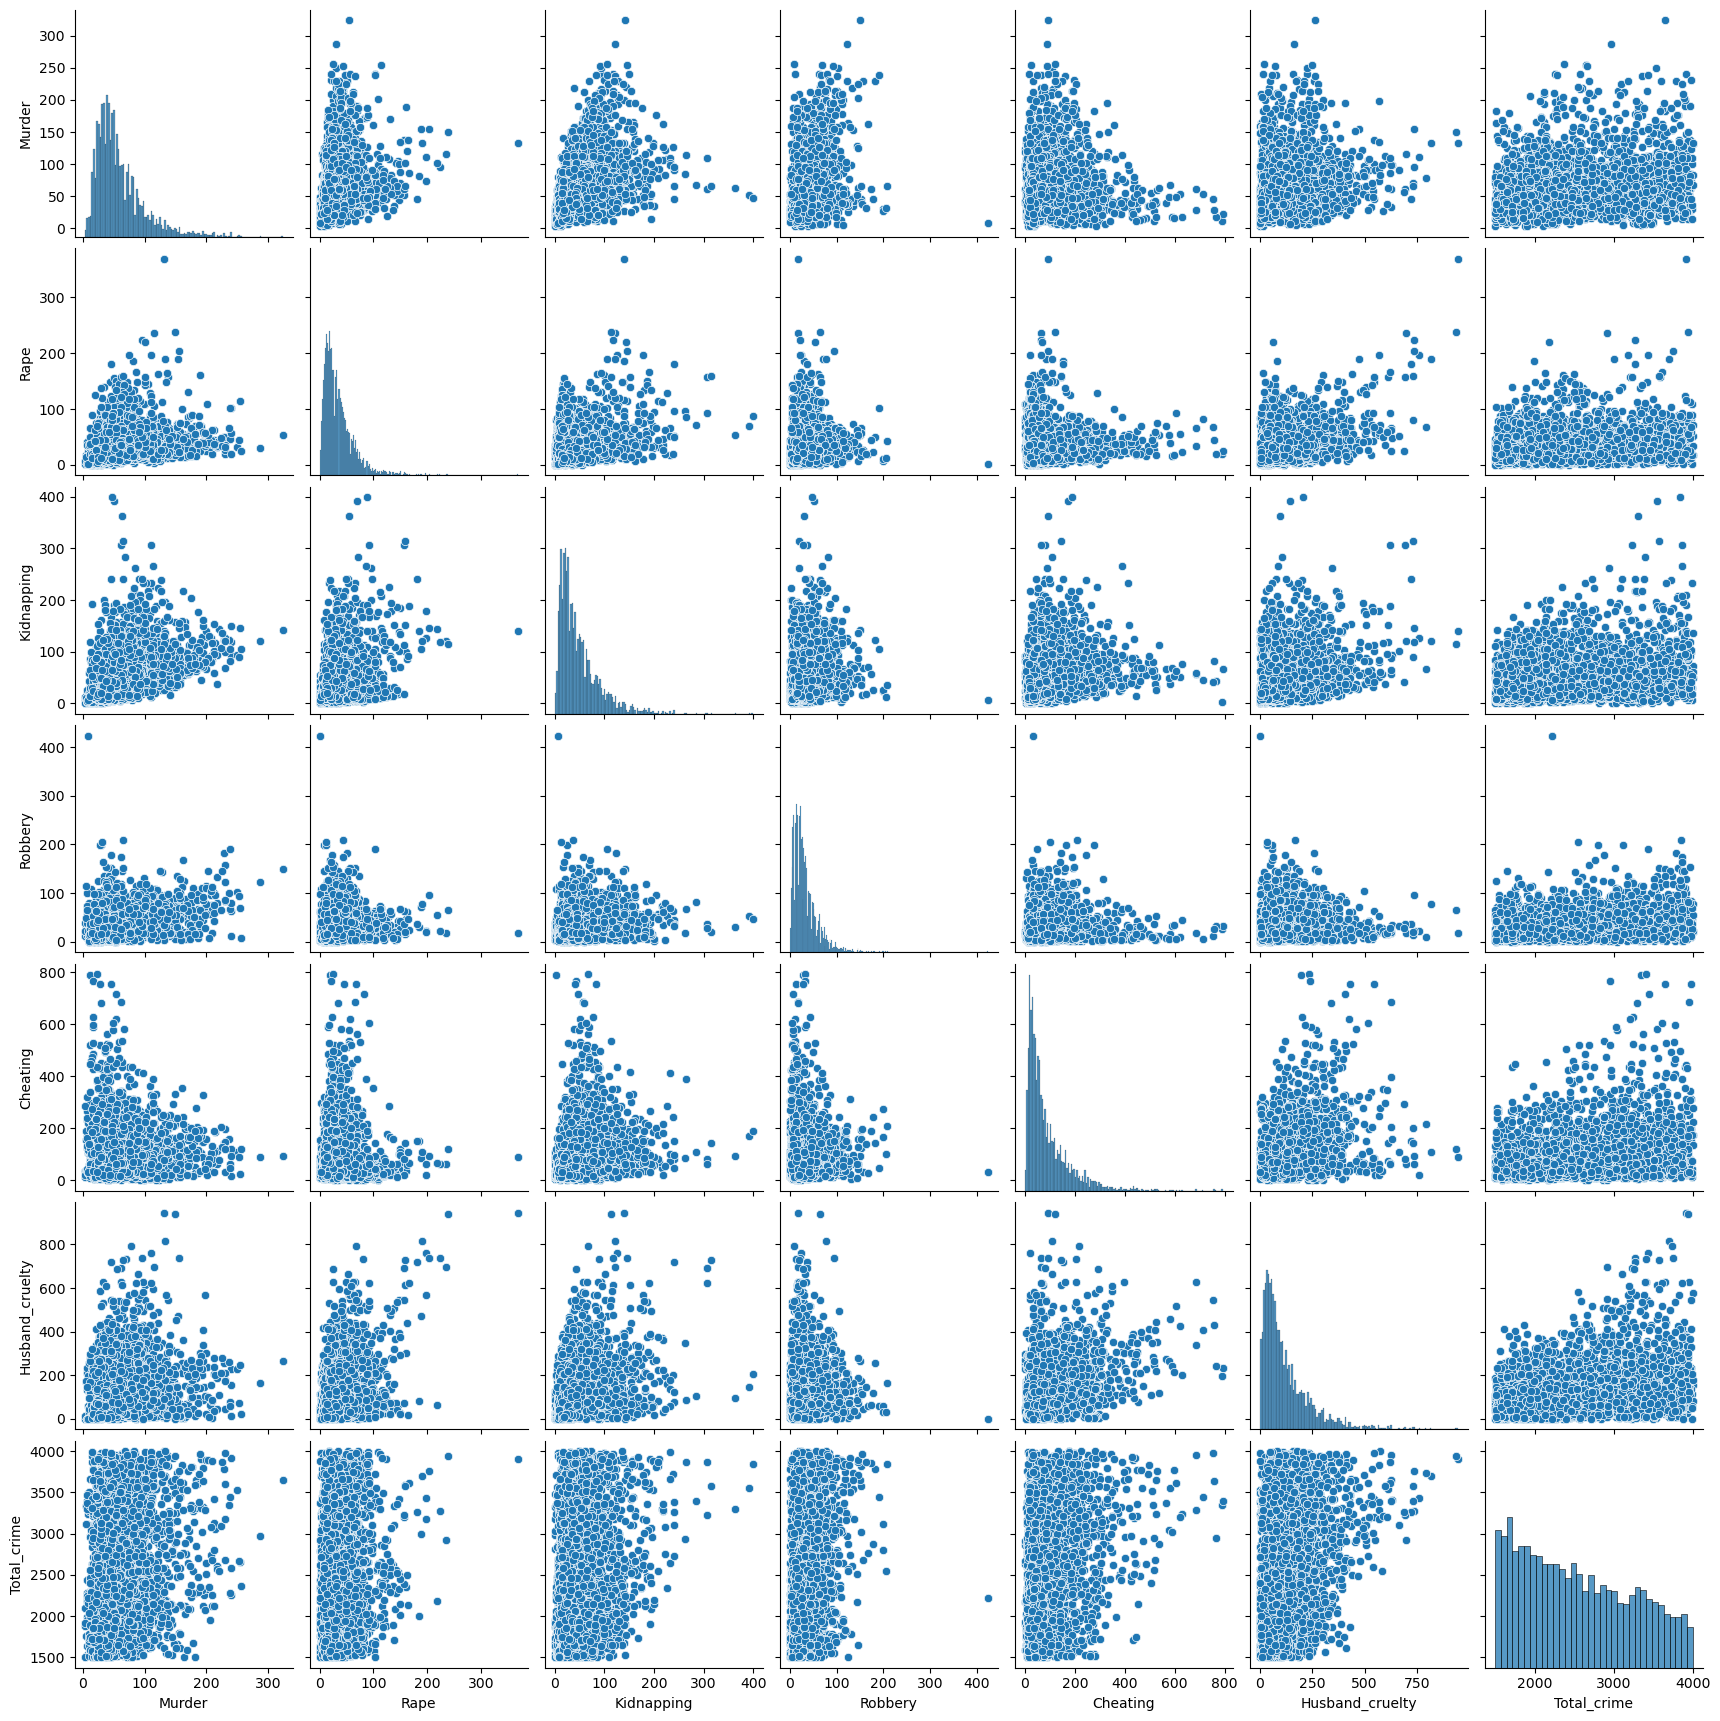

In [54]:
sns.pairplot(df)

the above plot shows that Statistical presentation of dataset and its columns.

It also shows the relationship between the columns and their relation.

# Checking outliers

Murder                AxesSubplot(0.125,0.11;0.0945122x0.77)
Rape               AxesSubplot(0.238415,0.11;0.0945122x0.77)
Kidnapping         AxesSubplot(0.351829,0.11;0.0945122x0.77)
Robbery            AxesSubplot(0.465244,0.11;0.0945122x0.77)
Cheating           AxesSubplot(0.578659,0.11;0.0945122x0.77)
Husband_cruelty    AxesSubplot(0.692073,0.11;0.0945122x0.77)
Total_crime        AxesSubplot(0.805488,0.11;0.0945122x0.77)
dtype: object

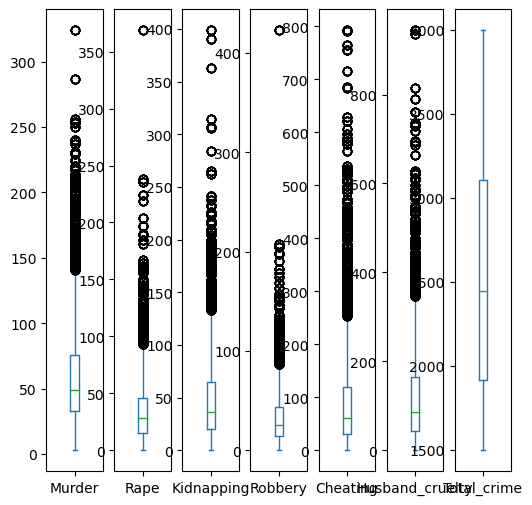

In [57]:
df.plot(kind='box' , subplots=True , figsize=(6,6))

As per above box plot we see there is outlier present in each of the columns and we need to remove it.

In [58]:
# finding limits

upper_limits = df['Cheating'].mean() + 3*df['Cheating'].std()
lower_limits = df['Cheating'].mean() - 3*df['Cheating'].std()

In [60]:
print('upper_limits' ,upper_limits)
print('lower_limits',lower_limits)

upper_limits 372.68554124103855
lower_limits -189.9473516646899


In [62]:
# finding outlier

df.loc[(df['Cheating'] > upper_limits) | (df['Cheating'] < lower_limits)]

State      District  Murder  Rape  Kidnapping  Robbery  \
175           PUNJAB      LUDHIANA      74    38          88       23   
187        RAJASTHAN       JODHPUR      30    20          78       43   
448        RAJASTHAN    GANGANAGAR      63    54          60        9   
699           PUNJAB     JALANDHAR      55    33          64        9   
710        RAJASTHAN    GANGANAGAR      59    75          51       11   
...              ...           ...     ...   ...         ...      ...   
32731      RAJASTHAN     JHUNJHUNU      36    45          63        9   
32732      RAJASTHAN  JODHPUR EAST      12    20          15       16   
32735      RAJASTHAN     KOTA CITY      28    45          82       27   
32765  UTTAR PRADESH      BAREILLY     114    86         265       68   
32775  UTTAR PRADESH     GORAKHPUR      98    52         232       69   

       Cheating  Husband_cruelty  Total_crime  
175         437              249         3192  
187         450              263         3358  
448         435              391         3894  
699         507              107         2400  
710         531              352         3764  
...         ...              ...          ...  
32731       510              347         3512  
32732       447              296         1750  
32735       756              428         3642  
32765       388               88         3867  
32775       413              180         3661  

[680 rows x 9 columns]

In [63]:
# trimming - delete the outliers

new_df = df.loc[(df['Cheating'] < upper_limits ) & (df['Cheating'] > lower_limits)]

In [64]:
# checking lenght of dataset after removing outliers
print(len(df))
print(len(new_df))

32810
32130


here we can see that there is difference between length of new and old dataset means outlier is removed.

In [65]:
df = new_df

In [66]:
df

State    District  Murder  Rape  Kidnapping  Robbery  \
0      ANDHRA PRADESH    ADILABAD     101    50          46       41   
1      ANDHRA PRADESH   ANANTAPUR     151    23          53       16   
2      ANDHRA PRADESH    CHITTOOR     101    27          59       14   
3      ANDHRA PRADESH    CUDDAPAH      80    20          25        4   
4      ANDHRA PRADESH  KARIMNAGAR     162    56          67       50   
...               ...         ...     ...   ...         ...      ...   
32805        DELHI UT     CENTRAL      35    31         180       47   
32806        DELHI UT       NORTH      25    14         153       45   
32807        DELHI UT  SOUTH-WEST      47    87         399       47   
32808      PUDUCHERRY  PUDUCHERRY      24     7          17       13   
32809      PUDUCHERRY       TOTAL      29    13          19       16   

       Cheating  Husband_cruelty  Total_crime  
0           104              175         2629  
1            65              154         2105  
2           209              186         3132  
3            37               57         1948  
4           243              224         3613  
...         ...              ...          ...  
32805       189               57         2723  
32806       127               70         2521  
32807       189              207         3838  
32808        75                5         2579  
32809        90                6         3128  

[32130 rows x 9 columns]

Now we will perform Unsupervised Learning as we have only x values.

In [68]:
# getting x values

x = df.iloc[:,3:]
x.tail(3)

Rape  Kidnapping  Robbery  Cheating  Husband_cruelty  Total_crime
32807    87         399       47       189              207         3838
32808     7          17       13        75                5         2579
32809    13          19       16        90                6         3128

# Use of Elbow Method

In [69]:
from sklearn.cluster import KMeans

In [70]:
# fitting k_means to dataset

km = KMeans(n_clusters=5 , init='k-means++')
y_km = km.fit_predict(x)
print(y_km)

[0 4 3 ... 2 0 3]


In [71]:
km.labels_

array([0, 4, 3, ..., 2, 0, 3])

In [72]:
# clusters center

km.cluster_centers_

array([[  37.06803797,   50.56962025,   33.56803797,   81.64082278,
         118.90348101, 2652.5       ],
       [  30.        ,   38.59022119,   26.53899884,   60.34807916,
          79.81490105, 1714.4330617 ],
       [  38.89791183,   63.29698376,   45.00928074,  112.77958237,
         160.0812065 , 3696.14849188],
       [  36.54025045,   53.16457961,   35.21824687,  108.09123435,
         167.43649374, 3177.03041145],
       [  33.91120219,   46.57377049,   30.16256831,   73.0273224 ,
          99.54371585, 2170.24590164]])

In [73]:
#  cluster0

x[y_km==0].head(3)

Rape  Kidnapping  Robbery  Cheating  Husband_cruelty  Total_crime
0     50          46       41       104              175         2629
7     29          47       22       126               92         2584
15    13          13        5       192              204         2812

In [74]:
#  cluster1

x[y_km==1].head(3)

Rape  Kidnapping  Robbery  Cheating  Husband_cruelty  Total_crime
9     35          26       26        87              192         1660
12    21          38       22       122              228         1857
14     8          12        4        53              108         1632

In [75]:
#  cluster2

x[y_km==2].head(3)

Rape  Kidnapping  Robbery  Cheating  Husband_cruelty  Total_crime
4     56          67       50       243              224         3613
8     59          42       27        84               69         3448
11    46          90       16       177              287         3558

As per above we can see the Cluster 2 has the highest in Total Crime.

In [76]:
# now we need to add column to show which row belongs to which group.

df['group cluster']=pd.DataFrame(data=km.labels_)
df

State    District  Murder  Rape  Kidnapping  Robbery  \
0      ANDHRA PRADESH    ADILABAD     101    50          46       41   
1      ANDHRA PRADESH   ANANTAPUR     151    23          53       16   
2      ANDHRA PRADESH    CHITTOOR     101    27          59       14   
3      ANDHRA PRADESH    CUDDAPAH      80    20          25        4   
4      ANDHRA PRADESH  KARIMNAGAR     162    56          67       50   
...               ...         ...     ...   ...         ...      ...   
32805        DELHI UT     CENTRAL      35    31         180       47   
32806        DELHI UT       NORTH      25    14         153       45   
32807        DELHI UT  SOUTH-WEST      47    87         399       47   
32808      PUDUCHERRY  PUDUCHERRY      24     7          17       13   
32809      PUDUCHERRY       TOTAL      29    13          19       16   

       Cheating  Husband_cruelty  Total_crime  group cluster  
0           104              175         2629            0.0  
1            65              154         2105            4.0  
2           209              186         3132            3.0  
3            37               57         1948            4.0  
4           243              224         3613            2.0  
...         ...              ...          ...            ...  
32805       189               57         2723            NaN  
32806       127               70         2521            NaN  
32807       189              207         3838            NaN  
32808        75                5         2579            NaN  
32809        90                6         3128            NaN  

[32130 rows x 10 columns]

In [77]:
# now saving this file into csv format

df.to_csv('SensitiveArea.csv',index=False)

In [78]:
# reloading the csv file

mydf = pd.read_csv('SensitiveArea.csv')
mydf

State    District  Murder  Rape  Kidnapping  Robbery  \
0      ANDHRA PRADESH    ADILABAD     101    50          46       41   
1      ANDHRA PRADESH   ANANTAPUR     151    23          53       16   
2      ANDHRA PRADESH    CHITTOOR     101    27          59       14   
3      ANDHRA PRADESH    CUDDAPAH      80    20          25        4   
4      ANDHRA PRADESH  KARIMNAGAR     162    56          67       50   
...               ...         ...     ...   ...         ...      ...   
32125        DELHI UT     CENTRAL      35    31         180       47   
32126        DELHI UT       NORTH      25    14         153       45   
32127        DELHI UT  SOUTH-WEST      47    87         399       47   
32128      PUDUCHERRY  PUDUCHERRY      24     7          17       13   
32129      PUDUCHERRY       TOTAL      29    13          19       16   

       Cheating  Husband_cruelty  Total_crime  group cluster  
0           104              175         2629            0.0  
1            65              154         2105            4.0  
2           209              186         3132            3.0  
3            37               57         1948            4.0  
4           243              224         3613            2.0  
...         ...              ...          ...            ...  
32125       189               57         2723            NaN  
32126       127               70         2521            NaN  
32127       189              207         3838            NaN  
32128        75                5         2579            NaN  
32129        90                6         3128            NaN  

[32130 rows x 10 columns]

# Moderate Area

In [4]:
row1 = cursor.execute("SELECT State,District,Murder,Rape,Kidnapping,Robbery,Cheating,Husband_cruelty FROM Crime WHERE Total_Crime >=500 AND Total_crime <=1500 ")
row1.fetchall()

[('ANDHRA PRADESH', 'VISAKHA RURAL', 58, 12, 12, 3, 39, 99),
 ('ANDHRA PRADESH', 'VIZIANAGARAM', 33, 8, 8, 2, 41, 121),
 ('ASSAM', 'BARPETA', 64, 28, 105, 45, 29, 95),
 ('ASSAM', 'BONGAIGAON', 45, 20, 36, 25, 13, 26),
 ('ASSAM', 'DARRANG', 61, 48, 64, 29, 25, 37),
 ('ASSAM', 'DHUBRI', 65, 43, 69, 19, 24, 111),
 ('ASSAM', 'DIBRUGARH', 110, 35, 57, 29, 12, 19),
 ('ASSAM', 'GOALPARA', 28, 35, 43, 13, 16, 64),
 ('ASSAM', 'GOLAGHAT', 53, 30, 44, 27, 20, 26),
 ('ASSAM', 'HAILAKANDI', 18, 24, 36, 8, 14, 28),
 ('ASSAM', 'JORHAT', 40, 42, 37, 27, 23, 48),
 ('ASSAM', 'KAMRUP', 37, 21, 95, 41, 50, 27),
 ('ASSAM', 'KARBI ANGLONG', 65, 5, 38, 33, 11, 8),
 ('ASSAM', 'KARIMGANJ', 32, 33, 42, 5, 8, 30),
 ('ASSAM', 'KOKRAJHAR', 87, 14, 41, 10, 10, 20),
 ('ASSAM', 'LAKHIMPUR', 26, 64, 72, 47, 71, 93),
 ('ASSAM', 'MORIGAON', 20, 23, 39, 10, 7, 28),
 ('ASSAM', 'NALBARI', 79, 30, 53, 39, 18, 15),
 ('ASSAM', 'SIBSAGAR', 59, 47, 64, 41, 29, 0),
 ('ASSAM', 'TINSUKIA', 107, 41, 62, 35, 10, 21),
 ('BIHAR', 'BAG

In [6]:
sql_query1 = pd.read_sql_query("SELECT State,District,Murder,Rape,Kidnapping,Robbery,Cheating,Husband_cruelty,Total_crime FROM Crime WHERE Total_Crime >=500 AND Total_crime <=1500  ",connection)

# Converting sql into DataFrame
df1 = pd.DataFrame(sql_query1 ,columns = ['State','District','Murder','Rape','Kidnapping','Robbery','Cheating','Husband_cruelty','Total_crime'])
print(df1)

                State        District  Murder  Rape  Kidnapping  Robbery  \
0      ANDHRA PRADESH   VISAKHA RURAL      58    12          12        3   
1      ANDHRA PRADESH    VIZIANAGARAM      33     8           8        2   
2               ASSAM         BARPETA      64    28         105       45   
3               ASSAM      BONGAIGAON      45    20          36       25   
4               ASSAM         DARRANG      61    48          64       29   
...               ...             ...     ...   ...         ...      ...   
28320     WEST BENGAL  SEALDAH G.R.P.      19     0           7       10   
28321   A & N ISLANDS           TOTAL      15    12           8        2   
28322        DELHI UT        GRP(RLY)      13     4          27       12   
28323        DELHI UT       NEW DELHI       9     5          28        9   
28324      PUDUCHERRY        KARAIKAL       5     6           2        3   

       Cheating  Husband_cruelty  Total_crime  
0            39               99       

In [7]:
df1

State        District  Murder  Rape  Kidnapping  Robbery  \
0      ANDHRA PRADESH   VISAKHA RURAL      58    12          12        3   
1      ANDHRA PRADESH    VIZIANAGARAM      33     8           8        2   
2               ASSAM         BARPETA      64    28         105       45   
3               ASSAM      BONGAIGAON      45    20          36       25   
4               ASSAM         DARRANG      61    48          64       29   
...               ...             ...     ...   ...         ...      ...   
28320     WEST BENGAL  SEALDAH G.R.P.      19     0           7       10   
28321   A & N ISLANDS           TOTAL      15    12           8        2   
28322        DELHI UT        GRP(RLY)      13     4          27       12   
28323        DELHI UT       NEW DELHI       9     5          28        9   
28324      PUDUCHERRY        KARAIKAL       5     6           2        3   

       Cheating  Husband_cruelty  Total_crime  
0            39               99         1371  
1            41              121         1408  
2            29               95         1330  
3            13               26          655  
4            25               37          976  
...         ...              ...          ...  
28320        14                0          535  
28321        31                5          588  
28322        11                0          812  
28323       132                4          913  
28324        15                1          549  

[28325 rows x 9 columns]

# Performing EDA

In [82]:
df1.shape

(10300, 9)

In [83]:
df1.columns

Index(['State', 'District', 'Murder', 'Rape', 'Kidnapping', 'Robbery',
       'Cheating', 'Husband_cruelty', 'Total_crime'],
      dtype='object')

In [84]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10300 entries, 0 to 10299
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   State            10300 non-null  object
 1   District         10300 non-null  object
 2   Murder           10300 non-null  int64 
 3   Rape             10300 non-null  int64 
 4   Kidnapping       10300 non-null  int64 
 5   Robbery          10300 non-null  int64 
 6   Cheating         10300 non-null  int64 
 7   Husband_cruelty  10300 non-null  int64 
 8   Total_crime      10300 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 724.3+ KB


In [85]:
df1.dtypes

State              object
District           object
Murder              int64
Rape                int64
Kidnapping          int64
Robbery             int64
Cheating            int64
Husband_cruelty     int64
Total_crime         int64
dtype: object

as per above we can see that df1 ( Moderate Area ) has 2 type of data (object and integer).

In [86]:
df1.describe()

Murder          Rape    Kidnapping       Robbery      Cheating  \
count  10300.000000  10300.000000  10300.000000  10300.000000  10300.000000   
mean      37.388738     21.114563     26.870680     16.184078     37.731262   
std       26.059437     16.590417     22.881534     15.192134     45.118928   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%       19.000000      9.000000     10.000000      6.000000     13.000000   
50%       32.000000     17.000000     20.000000     12.000000     24.000000   
75%       50.000000     29.000000     38.000000     23.000000     47.000000   
max      243.000000    124.000000    181.000000    140.000000    617.000000   

       Husband_cruelty   Total_crime  
count     10300.000000  10300.000000  
mean         42.440388    967.650874  
std          44.462271    285.200315  
min           0.000000    500.000000  
25%          12.000000    714.000000  
50%          28.000000    954.000000  
75%          57.000000   1208.000000  
max         340.000000   1500.000000

Its statistical difference of numerical dataset.

As per above we can see that there is difference between mean and median.

In the above we can see that there is difference between max and 75% means there is outlier present in the dataset.

We can also get STD ,25% and min of dataset.

In [87]:
# Checking Null values

df1.isnull().sum()

State              0
District           0
Murder             0
Rape               0
Kidnapping         0
Robbery            0
Cheating           0
Husband_cruelty    0
Total_crime        0
dtype: int64

<AxesSubplot:>

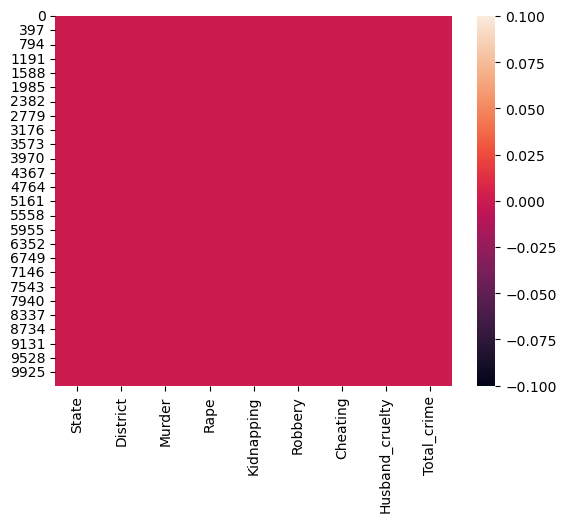

In [88]:
# Checking heatmap for null values

sns.heatmap(df1.isnull())

As per above heatmap we can see that there is no null value in the Moderate Area dataset.

In [89]:
# Checking correlation .

df1_corr = df1.corr()
df1_corr

Murder      Rape  Kidnapping   Robbery  Cheating  \
Murder           1.000000  0.302860    0.341903  0.477205  0.000842   
Rape             0.302860  1.000000    0.321244  0.162926 -0.029545   
Kidnapping       0.341903  0.321244    1.000000  0.204775  0.150961   
Robbery          0.477205  0.162926    0.204775  1.000000 -0.008045   
Cheating         0.000842 -0.029545    0.150961 -0.008045  1.000000   
Husband_cruelty  0.120570  0.394490    0.315743  0.099650  0.171441   
Total_crime      0.255793  0.269057    0.265551  0.354288  0.143293   

                 Husband_cruelty  Total_crime  
Murder                  0.120570     0.255793  
Rape                    0.394490     0.269057  
Kidnapping              0.315743     0.265551  
Robbery                 0.099650     0.354288  
Cheating                0.171441     0.143293  
Husband_cruelty         1.000000     0.387143  
Total_crime             0.387143     1.000000

<AxesSubplot:>

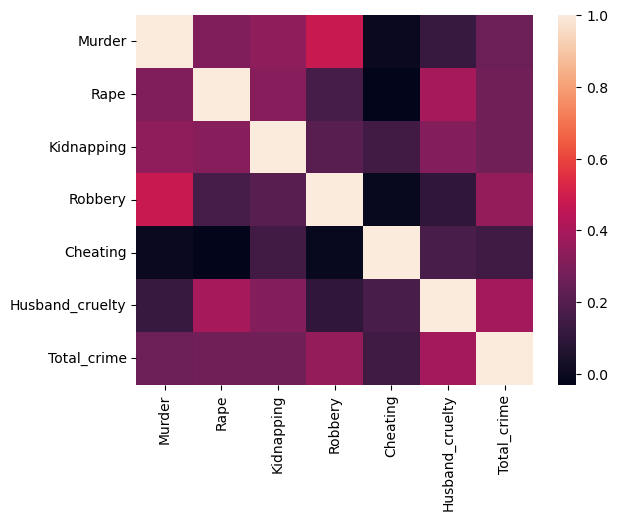

In [90]:
# heatmap for correlation

sns.heatmap(df1.corr())

# Data Visualization

<AxesSubplot:xlabel='Murder', ylabel='Density'>

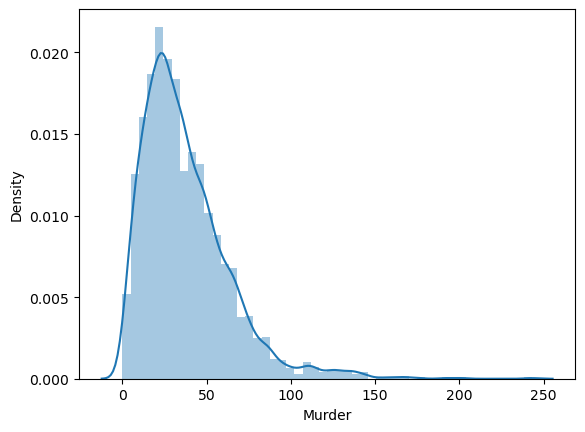

In [91]:
sns.distplot(df1['Murder'])

As per above plot we can see that maximum of murder is done between 0 to 100.

<AxesSubplot:xlabel='Rape', ylabel='Count'>

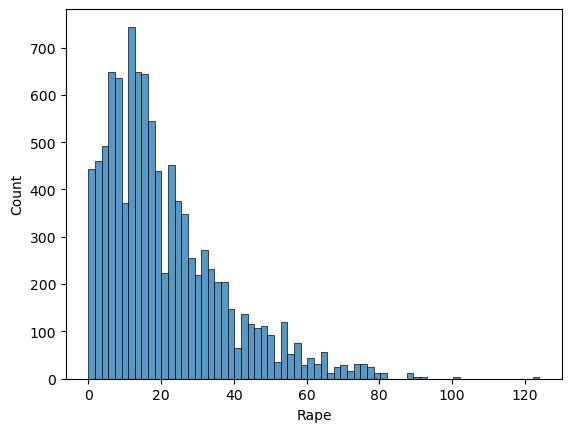

In [92]:
sns.histplot(df1['Rape'])

In the above plot we can see that Rape count is maximum at point 0.

<AxesSubplot:xlabel='State', ylabel='count'>

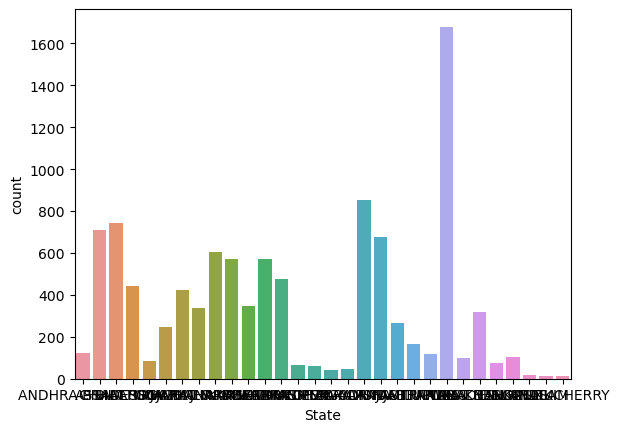

In [93]:
sns.countplot(df1['State'])

<AxesSubplot:xlabel='Cheating'>

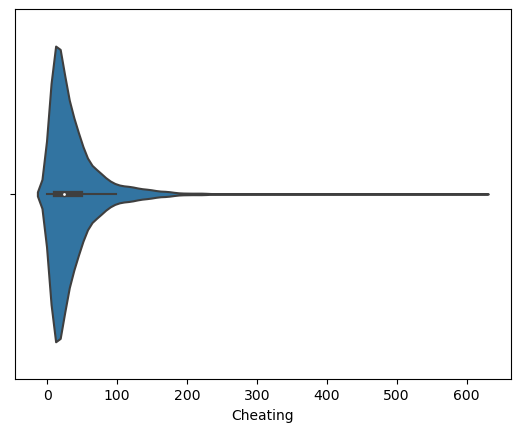

In [94]:
sns.violinplot(df1['Cheating'])

In the above plot we can see that highest value is at point 0 .

<AxesSubplot:xlabel='Kidnapping', ylabel='Count'>

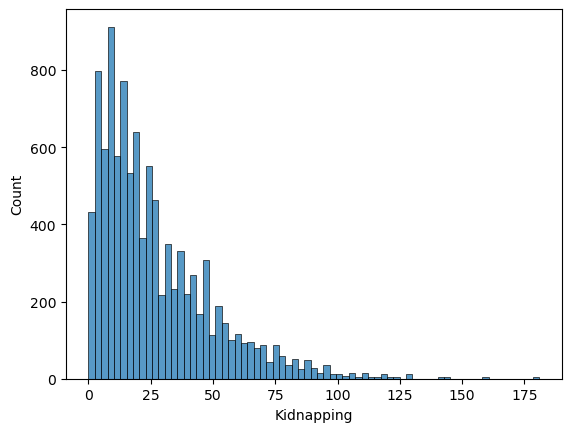

In [95]:
sns.histplot(df1['Kidnapping'])

In the above plot maximum of kidnapping is done between 0 to 25 points.

<AxesSubplot:xlabel='Husband_cruelty', ylabel='Density'>

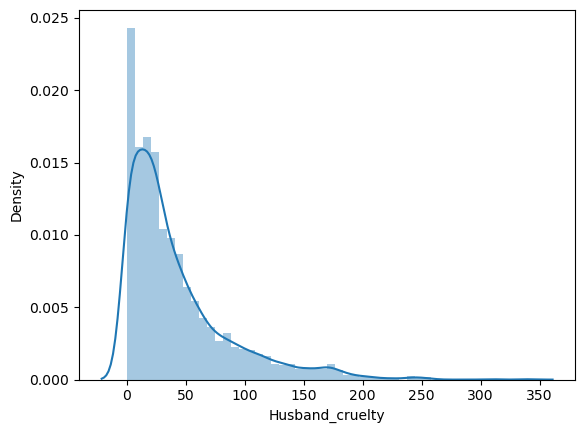

In [96]:
sns.distplot(df1['Husband_cruelty'])

In this plot of Husband_cruelty is maximum between 0 to 50 .

<AxesSubplot:xlabel='Total_crime', ylabel='Count'>

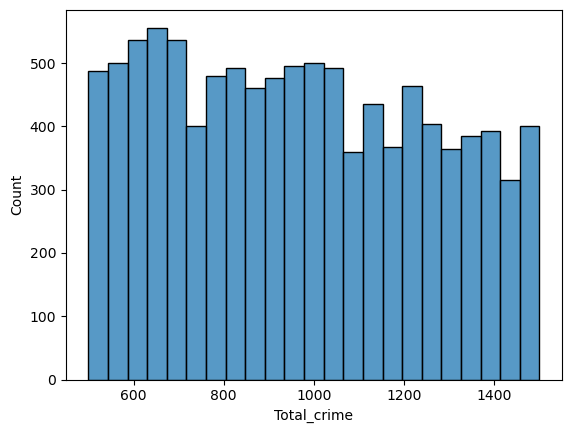

In [97]:
sns.histplot(df1['Total_crime'])

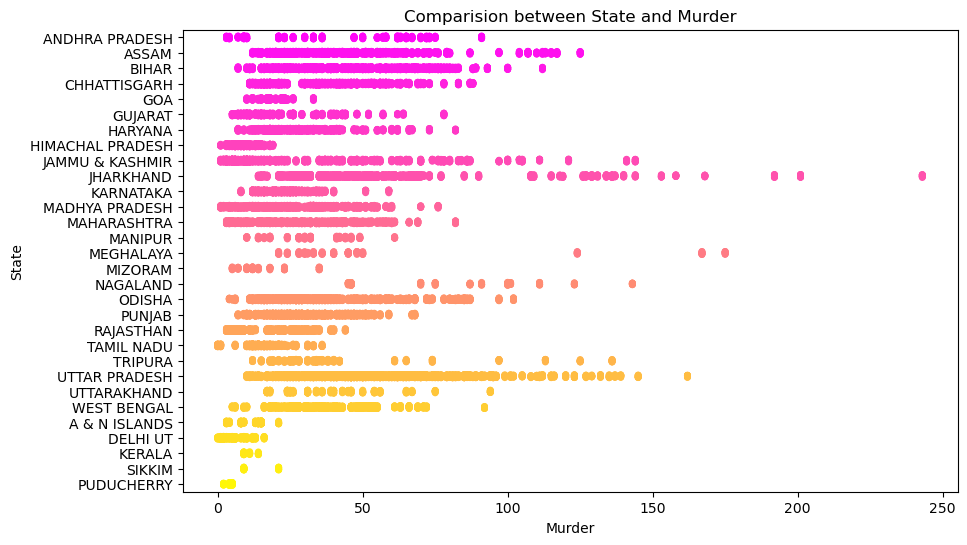

In [8]:
# Comparision between State and Murder

plt.figure(figsize=(10,6))
plt.title('Comparision between State and Murder')
sns.stripplot(x='Murder',y='State' ,data=df1 ,palette='spring')
plt.show()

In the above plot we can see that State Uttar pradesh has the highest number of murder.

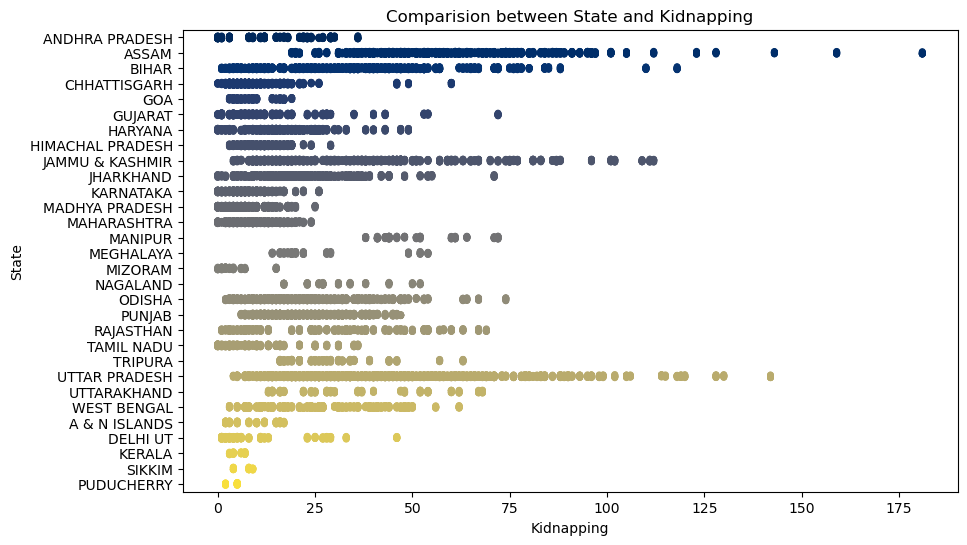

In [9]:
# Comparision between State and Kidnapping

plt.figure(figsize=(10,6))
plt.title('Comparision between State and Kidnapping')
sns.stripplot(x='Kidnapping',y='State' ,data=df1 ,palette='cividis')
plt.show()

In the above plot we can see that state Uttar Pradesh has the highest kidnapping rate.

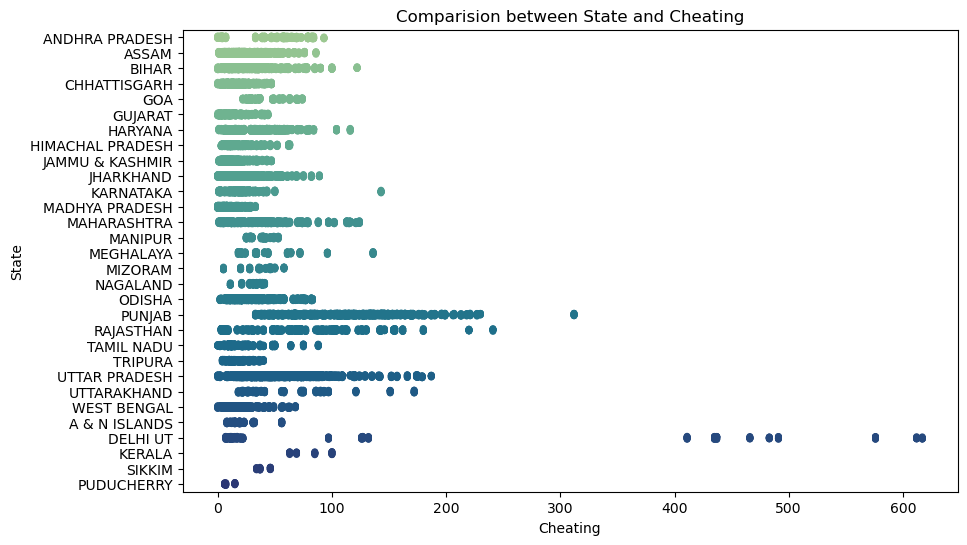

In [10]:
# Comparision between State and Cheating

plt.figure(figsize=(10,6))
plt.title('Comparision between State and Cheating')
sns.stripplot(x='Cheating',y='State' ,data=df1 ,palette='crest')
plt.show()

In the above plot we can see that state Punjab has the highest Cheating rate .

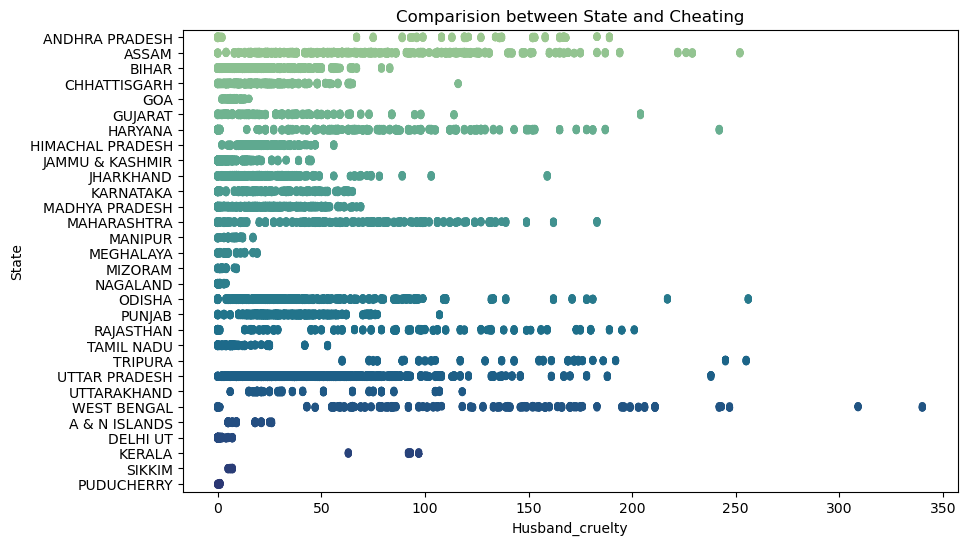

In [11]:
# Comparision between State and Cheating

plt.figure(figsize=(10,6))
plt.title('Comparision between State and Cheating')
sns.stripplot(x='Husband_cruelty',y='State' ,data=df1 ,palette='crest')
plt.show()

As per above plot Husband_cruelty case is higher in Assam.

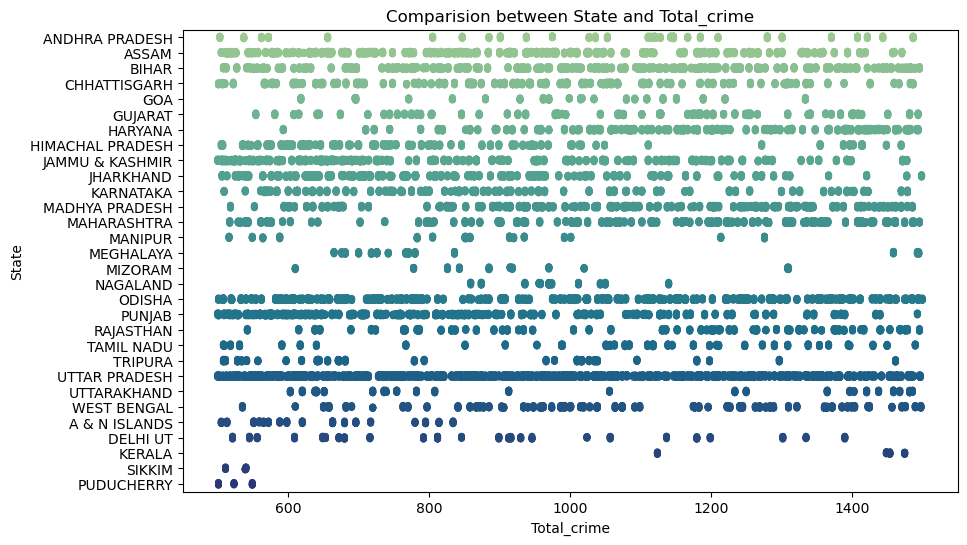

In [12]:
# Comparision between State and Total_crime

plt.figure(figsize=(10,6))
plt.title('Comparision between State and Total_crime')
sns.stripplot(x='Total_crime',y='State' ,data=df1 ,palette='crest')
plt.show()

In the above plot we see that all over total crime rate is high in Uttar Pradesh.

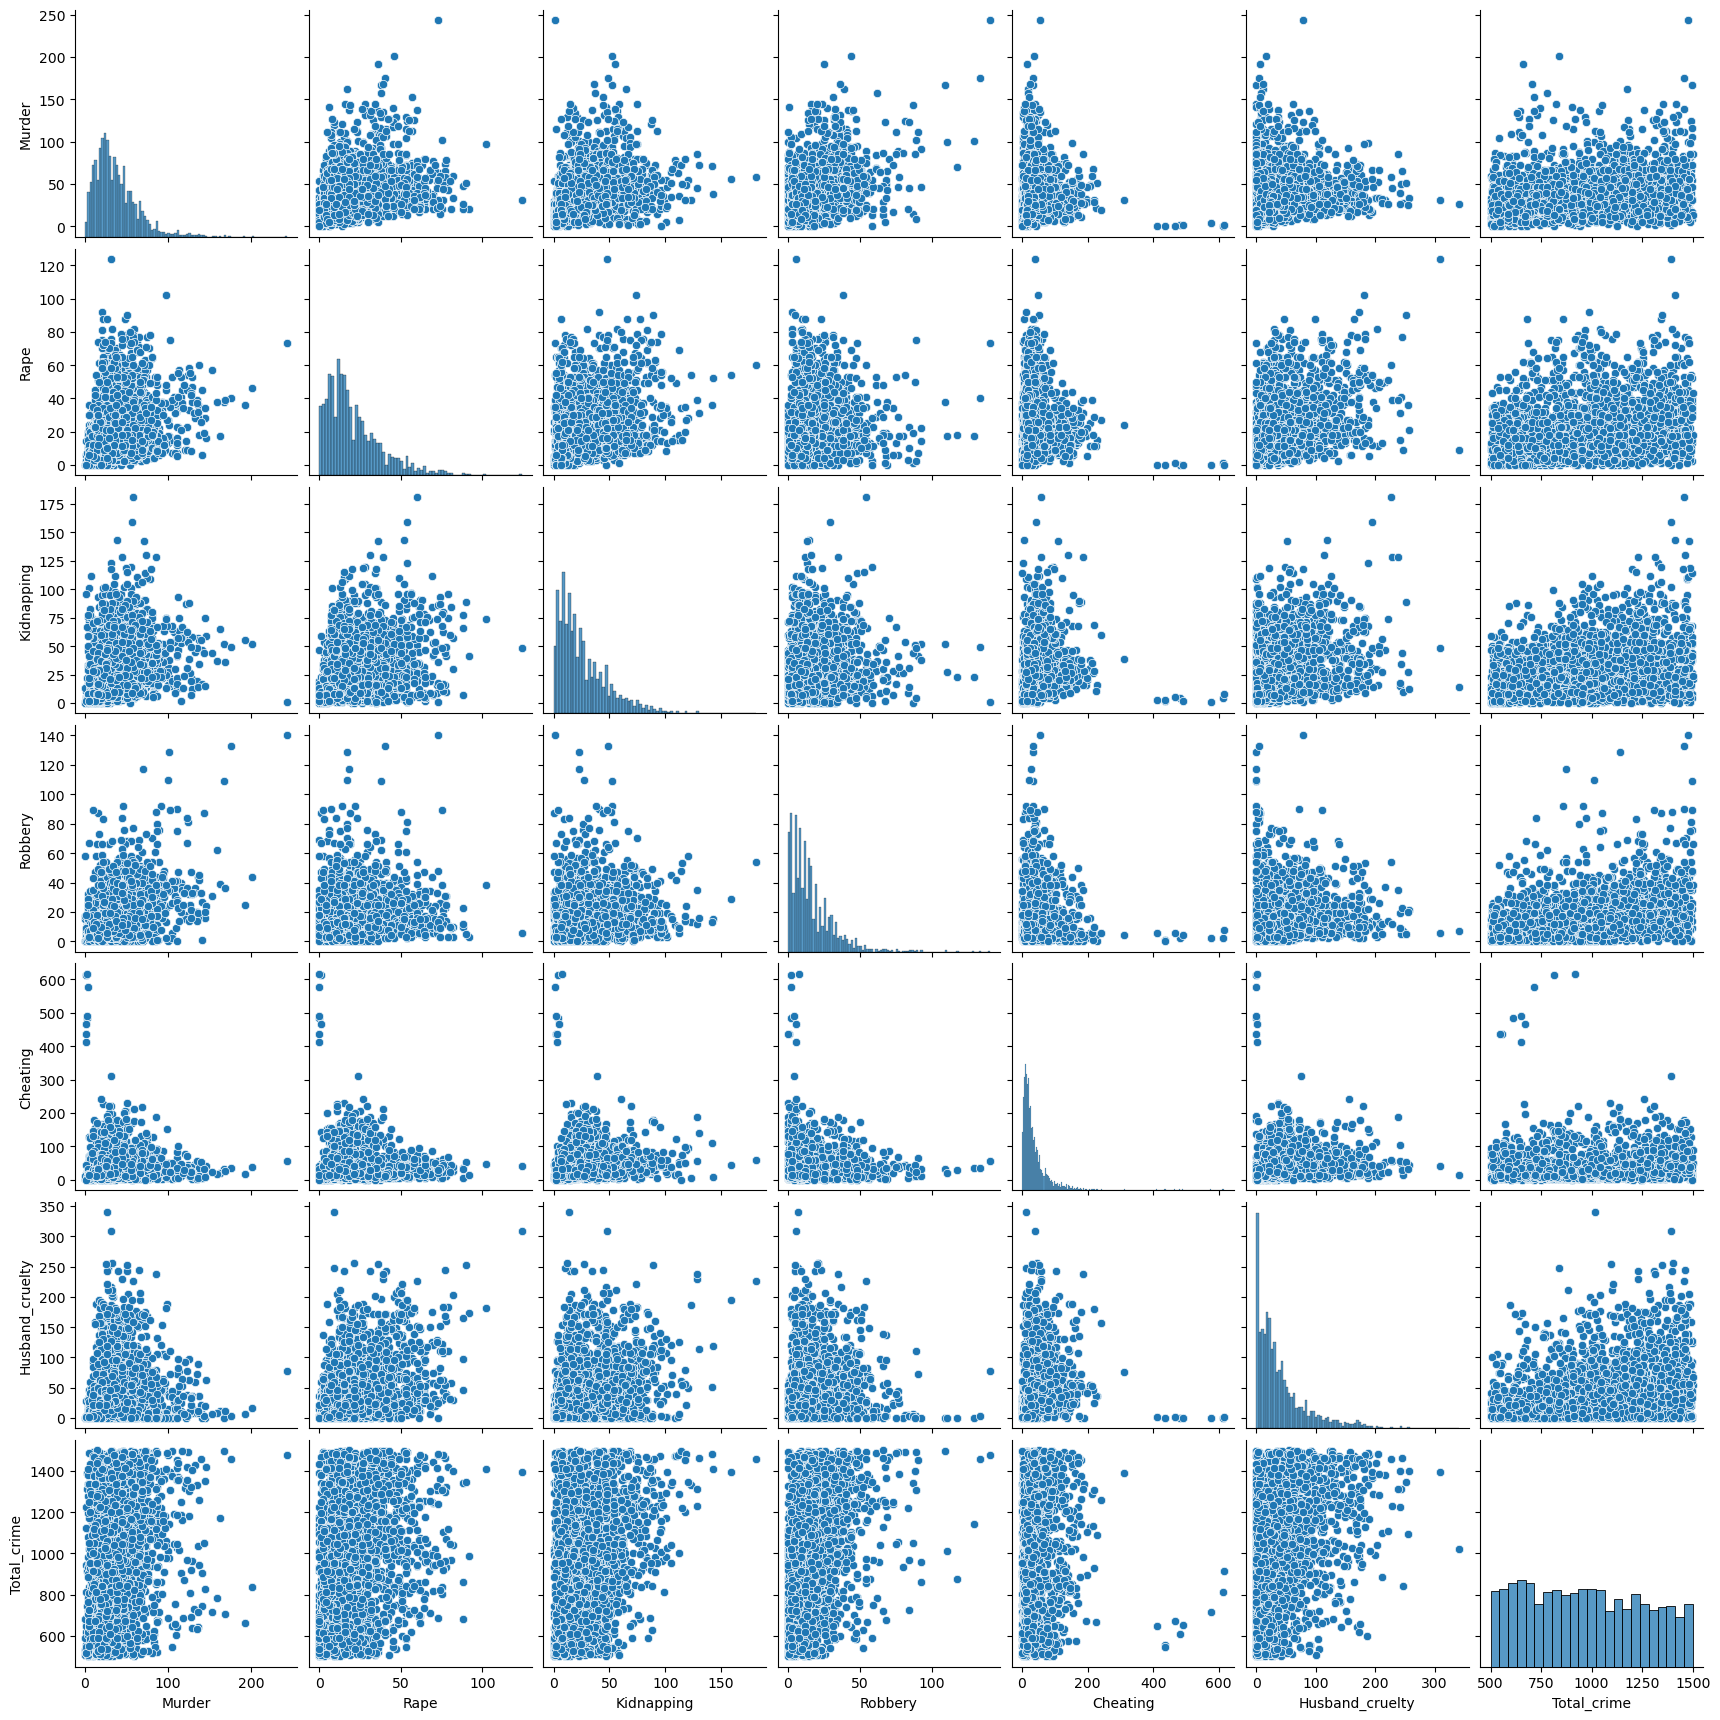

In [103]:
sns.pairplot(df1)

Its pairwise presentation of dataset.

# Checking Outliers

<Figure size 800x200 with 0 Axes>

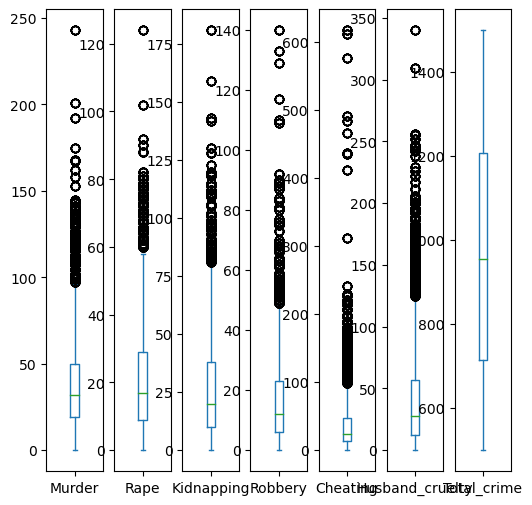

In [13]:
plt.figure(figsize=(8,2))
df1.plot(kind='box' ,subplots=True  ,figsize=(6,6))
plt.show()

as per above we can see that there is outlier is present in some of the columns and we need to remove it.

In [105]:
# Finding Limits

upper_limits = df1['Robbery'].mean() + 3*df1['Robbery'].std()
lower_limits = df1['Robbery'].mean() - 3*df1['Robbery'].std()

In [106]:
print('upper_limits' ,upper_limits)
print('lower_limits',lower_limits)

upper_limits 61.760481149078394
lower_limits -29.39232580927257


In [107]:
# finding outlier

df1.loc[(df1['Robbery'] > upper_limits) | (df1['Robbery'] < lower_limits)]

State          District  Murder  Rape  Kidnapping  Robbery  \
49         GUJARAT             W.RLY      15     1           0       87   
90       JHARKHAND            RANCHI     243    73           1      140   
122      MEGHALAYA  KHASI HILLS EAST      50     5          20       68   
124       NAGALAND             TOTAL     101    17          23      129   
249        GUJARAT             DAHOD      64    14           9       64   
...            ...               ...     ...   ...         ...      ...   
10015       ODISHA            KHURDA      20    29          30       66   
10200  MAHARASHTRA       NAGPUR RLY.       5     1           2       67   
10210       ODISHA          BARAGARH      33    35          36       68   
10211       ODISHA         DHENKANAL      47    29          41       76   
10212       ODISHA            GANJAM      86    53          67       75   

       Cheating  Husband_cruelty  Total_crime  
49           10                7         1341  
90           55               78         1478  
122          18                3          676  
124          34                0         1140  
249           6               18         1256  
...         ...              ...          ...  
10015        29              139         1463  
10200         3                3         1247  
10210        34               96         1366  
10211        40               33         1494  
10212        37               39         1486  

[172 rows x 9 columns]

In [108]:
# trimming - delete the outliers

new_df1 = df1.loc[(df1['Robbery'] < upper_limits ) & (df1['Robbery'] > lower_limits)]

In [109]:
# checking lenght of dataset after removing outliers
print(len(df1))
print(len(new_df1))

10300
10128


In [110]:
# capping - change outlier value to upper or lower limit values

new_df1 = df1.copy()
new_df1.loc[(new_df1['Robbery'] > upper_limits) , 'Robbery'] = upper_limits
new_df1.loc[(new_df1['Robbery'] < lower_limits) , 'Robbery'] = lower_limits

print(len(new_df1))

10300


now the length of old dataset and new dataset is same.

In [111]:
df1 = new_df1

In [112]:
df1

State        District  Murder  Rape  Kidnapping  Robbery  \
0      ANDHRA PRADESH   VISAKHA RURAL      58    12          12      3.0   
1      ANDHRA PRADESH    VIZIANAGARAM      33     8           8      2.0   
2               ASSAM         BARPETA      64    28         105     45.0   
3               ASSAM      BONGAIGAON      45    20          36     25.0   
4               ASSAM         DARRANG      61    48          64     29.0   
...               ...             ...     ...   ...         ...      ...   
10295     WEST BENGAL  SEALDAH G.R.P.      19     0           7     10.0   
10296   A & N ISLANDS           TOTAL      15    12           8      2.0   
10297        DELHI UT        GRP(RLY)      13     4          27     12.0   
10298        DELHI UT       NEW DELHI       9     5          28      9.0   
10299      PUDUCHERRY        KARAIKAL       5     6           2      3.0   

       Cheating  Husband_cruelty  Total_crime  
0            39               99         1371  
1            41              121         1408  
2            29               95         1330  
3            13               26          655  
4            25               37          976  
...         ...              ...          ...  
10295        14                0          535  
10296        31                5          588  
10297        11                0          812  
10298       132                4          913  
10299        15                1          549  

[10300 rows x 9 columns]

Now we will perform Unsupervised Learning on the dataset as we have only x values.

In [113]:
# Getting x value

x = df1.iloc[:,3:]
x

Rape  Kidnapping  Robbery  Cheating  Husband_cruelty  Total_crime
0        12          12      3.0        39               99         1371
1         8           8      2.0        41              121         1408
2        28         105     45.0        29               95         1330
3        20          36     25.0        13               26          655
4        48          64     29.0        25               37          976
...     ...         ...      ...       ...              ...          ...
10295     0           7     10.0        14                0          535
10296    12           8      2.0        31                5          588
10297     4          27     12.0        11                0          812
10298     5          28      9.0       132                4          913
10299     6           2      3.0        15                1          549

[10300 rows x 6 columns]

# Use of Elbow method

In [114]:
from sklearn.cluster import KMeans

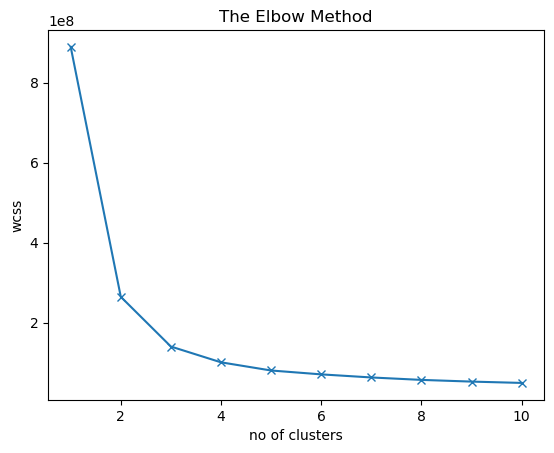

In [115]:
wcss=[]
for i in range(1,11):
    km=KMeans(n_clusters=i,init='k-means++')
    km.fit(x)
    wcss.append(km.inertia_)
    
plt.plot(range(1,11) ,wcss , marker='x')
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show()

# k-means++ it select initial cluster center for kmeans clustering ina smart way to speedup convergence.

In [116]:
# fitting k_means to dataset

km = KMeans(n_clusters=5 , init='k-means++')
y_km = km.fit_predict(x)
print(y_km)

[4 4 4 ... 2 3 1]


In [117]:
km.labels_

array([4, 4, 4, ..., 2, 3, 1])

In [118]:
# clusters center

km.cluster_centers_

array([[  23.66525424,   33.04237288,   20.34873901,   43.65466102,
          54.05508475, 1191.14194915],
       [  14.92524917,   18.64285714,    9.48631309,   29.14784053,
          20.35714286,  602.23754153],
       [  18.46796117,   23.6776699 ,   12.63456778,   36.63495146,
          31.67961165,  796.45242718],
       [  22.88703704,   26.69814815,   15.85156357,   33.98518519,
          44.1537037 ,  989.26481481],
       [  27.6793722 ,   35.34080717,   23.38495215,   48.84977578,
          70.30717489, 1395.87219731]])

In [120]:
# looking for point which belongs to cluster0

x[y_km==0].head(3)

Rape  Kidnapping  Robbery  Cheating  Husband_cruelty  Total_crime
5     43          69     19.0        24              111         1180
15    64          72     47.0        71               93         1256
18    47          64     41.0        29                0         1207

In [121]:
# cluster 1

x[y_km==1].head(3)

Rape  Kidnapping  Robbery  Cheating  Husband_cruelty  Total_crime
3    20          36     25.0        13               26          655
7    35          43     13.0        16               64          655
9    24          36      8.0        14               28          682

In [122]:
#cluster 2

x[y_km==2].head(4)

Rape  Kidnapping  Robbery  Cheating  Husband_cruelty  Total_crime
13    33          42      5.0         8               30          718
23    10          14     14.0         7               15          783
25     5          34     29.0         6                2          815
26    22          23     10.0         5               39          851

As per above all the clusters , cluster 0 has higher number of total crime.

In [123]:
df1

State        District  Murder  Rape  Kidnapping  Robbery  \
0      ANDHRA PRADESH   VISAKHA RURAL      58    12          12      3.0   
1      ANDHRA PRADESH    VIZIANAGARAM      33     8           8      2.0   
2               ASSAM         BARPETA      64    28         105     45.0   
3               ASSAM      BONGAIGAON      45    20          36     25.0   
4               ASSAM         DARRANG      61    48          64     29.0   
...               ...             ...     ...   ...         ...      ...   
10295     WEST BENGAL  SEALDAH G.R.P.      19     0           7     10.0   
10296   A & N ISLANDS           TOTAL      15    12           8      2.0   
10297        DELHI UT        GRP(RLY)      13     4          27     12.0   
10298        DELHI UT       NEW DELHI       9     5          28      9.0   
10299      PUDUCHERRY        KARAIKAL       5     6           2      3.0   

       Cheating  Husband_cruelty  Total_crime  
0            39               99         1371  
1            41              121         1408  
2            29               95         1330  
3            13               26          655  
4            25               37          976  
...         ...              ...          ...  
10295        14                0          535  
10296        31                5          588  
10297        11                0          812  
10298       132                4          913  
10299        15                1          549  

[10300 rows x 9 columns]

In [158]:
# now we need to add column to show which row belongs to which group.

df1['group cluster']=pd.DataFrame(data=km.labels_)
df1

State        District  Murder  Rape  Kidnapping  Robbery  \
0      ANDHRA PRADESH   VISAKHA RURAL      58    12          12      3.0   
1      ANDHRA PRADESH    VIZIANAGARAM      33     8           8      2.0   
2               ASSAM         BARPETA      64    28         105     45.0   
3               ASSAM      BONGAIGAON      45    20          36     25.0   
4               ASSAM         DARRANG      61    48          64     29.0   
...               ...             ...     ...   ...         ...      ...   
10295     WEST BENGAL  SEALDAH G.R.P.      19     0           7     10.0   
10296   A & N ISLANDS           TOTAL      15    12           8      2.0   
10297        DELHI UT        GRP(RLY)      13     4          27     12.0   
10298        DELHI UT       NEW DELHI       9     5          28      9.0   
10299      PUDUCHERRY        KARAIKAL       5     6           2      3.0   

       Cheating  Husband_cruelty  Total_crime  group cluster  
0            39               99         1371              4  
1            41              121         1408              4  
2            29               95         1330              4  
3            13               26          655              1  
4            25               37          976              3  
...         ...              ...          ...            ...  
10295        14                0          535              1  
10296        31                5          588              1  
10297        11                0          812              2  
10298       132                4          913              3  
10299        15                1          549              1  

[10300 rows x 10 columns]

In [159]:
# now saving this file into csv format

df1.to_csv('ModerateArea.csv',index=False)

In [160]:
# reloading the csv file

mydf1 = pd.read_csv('ModerateArea.csv')
mydf1

State        District  Murder  Rape  Kidnapping  Robbery  \
0      ANDHRA PRADESH   VISAKHA RURAL      58    12          12      3.0   
1      ANDHRA PRADESH    VIZIANAGARAM      33     8           8      2.0   
2               ASSAM         BARPETA      64    28         105     45.0   
3               ASSAM      BONGAIGAON      45    20          36     25.0   
4               ASSAM         DARRANG      61    48          64     29.0   
...               ...             ...     ...   ...         ...      ...   
10295     WEST BENGAL  SEALDAH G.R.P.      19     0           7     10.0   
10296   A & N ISLANDS           TOTAL      15    12           8      2.0   
10297        DELHI UT        GRP(RLY)      13     4          27     12.0   
10298        DELHI UT       NEW DELHI       9     5          28      9.0   
10299      PUDUCHERRY        KARAIKAL       5     6           2      3.0   

       Cheating  Husband_cruelty  Total_crime  group cluster  
0            39               99         1371              4  
1            41              121         1408              4  
2            29               95         1330              4  
3            13               26          655              1  
4            25               37          976              3  
...         ...              ...          ...            ...  
10295        14                0          535              1  
10296        31                5          588              1  
10297        11                0          812              2  
10298       132                4          913              3  
10299        15                1          549              1  

[10300 rows x 10 columns]

Here Unsupervised learning is done for Moderate dataset.

# Peaceful Area

In [13]:
row2 = cursor.execute("SELECT State,District,Murder,Rape,Kidnapping,Robbery,Cheating,Husband_cruelty FROM Crime WHERE Total_Crime <=50")
row2.fetchall()

[('ARUNACHAL PRADESH', 'SIANG UPPER', 1, 2, 5, 0, 0, 0),
 ('ARUNACHAL PRADESH', 'TAWANG', 2, 1, 0, 0, 1, 0),
 ('ASSAM', 'C.I.D.', 0, 0, 0, 0, 5, 0),
 ('HIMACHAL PRADESH', 'G.R.P.', 1, 0, 0, 0, 0, 0),
 ('HIMACHAL PRADESH', 'LAHAUL-SPITI', 1, 2, 1, 1, 1, 1),
 ('JAMMU & KASHMIR', 'CRIME JAMMU', 0, 0, 0, 0, 27, 0),
 ('JAMMU & KASHMIR', 'RAILWAYS', 1, 0, 0, 0, 0, 0),
 ('MANIPUR', 'TAMENGLONG', 2, 0, 0, 0, 0, 0),
 ('MANIPUR', 'UKHRUL', 4, 0, 1, 3, 0, 0),
 ('MEGHALAYA', 'GARO HILLS SOUTH', 6, 1, 2, 4, 0, 1),
 ('MIZORAM', 'SERCHHIP', 1, 5, 1, 1, 0, 0),
 ('NAGALAND', 'KIPHIRE', 1, 0, 0, 0, 0, 0),
 ('NAGALAND', 'MON', 3, 2, 2, 5, 2, 0),
 ('NAGALAND', 'PEREN', 0, 0, 0, 1, 1, 0),
 ('NAGALAND', 'PHEK', 7, 1, 2, 2, 0, 0),
 ('NAGALAND', 'TUENSANG', 1, 0, 0, 2, 2, 0),
 ('SIKKIM', 'NORTH', 1, 0, 0, 0, 3, 0),
 ('SIKKIM', 'WEST', 1, 0, 1, 1, 0, 0),
 ('A & N ISLANDS', 'NICOBAR', 0, 0, 0, 0, 0, 0),
 ('DAMAN & DIU', 'DIU', 1, 0, 0, 0, 2, 0),
 ('DELHI UT', 'S.T.F.', 0, 0, 0, 0, 0, 0),
 ('LAKSHADWEEP', 'LAKSH

In [14]:
sql_query2 = pd.read_sql_query("SELECT State,District,Murder,Rape,Kidnapping,Robbery,Cheating,Husband_cruelty,Total_crime FROM Crime WHERE Total_Crime <=50 ",connection)

# Converting sql into DataFrame
df2 = pd.DataFrame(sql_query2 ,columns = ['State','District','Murder','Rape','Kidnapping','Robbery','Cheating','Husband_cruelty','Total_crime'])
print(df2)

                  State      District  Murder  Rape  Kidnapping  Robbery  \
0     ARUNACHAL PRADESH   SIANG UPPER       1     2           5        0   
1     ARUNACHAL PRADESH        TAWANG       2     1           0        0   
2                 ASSAM        C.I.D.       0     0           0        0   
3      HIMACHAL PRADESH        G.R.P.       1     0           0        0   
4      HIMACHAL PRADESH  LAHAUL-SPITI       1     2           1        1   
...                 ...           ...     ...   ...         ...      ...   
1163        UTTARAKHAND       CHAMOLI       1     2           2        0   
1164        UTTARAKHAND     CHAMPAWAT       2     3           0        1   
1165      A & N ISLANDS           CAR       2     0           1        0   
1166        DAMAN & DIU           DIU       0     0           1        0   
1167           DELHI UT           STF       0     0           0        0   

      Cheating  Husband_cruelty  Total_crime  
0            0                0         

In [16]:
df2

State      District  Murder  Rape  Kidnapping  Robbery  \
0     ARUNACHAL PRADESH   SIANG UPPER       1     2           5        0   
1     ARUNACHAL PRADESH        TAWANG       2     1           0        0   
2                 ASSAM        C.I.D.       0     0           0        0   
3      HIMACHAL PRADESH        G.R.P.       1     0           0        0   
4      HIMACHAL PRADESH  LAHAUL-SPITI       1     2           1        1   
...                 ...           ...     ...   ...         ...      ...   
1163        UTTARAKHAND       CHAMOLI       1     2           2        0   
1164        UTTARAKHAND     CHAMPAWAT       2     3           0        1   
1165      A & N ISLANDS           CAR       2     0           1        0   
1166        DAMAN & DIU           DIU       0     0           1        0   
1167           DELHI UT           STF       0     0           0        0   

      Cheating  Husband_cruelty  Total_crime  
0            0                0           35  
1            1                0           40  
2            5                0            8  
3            0                0            4  
4            1                1           39  
...        ...              ...          ...  
1163         5                0           47  
1164         6                0           44  
1165         2                0           18  
1166         1                2           25  
1167         2                0            4  

[1168 rows x 9 columns]

# Performing EDA

In [19]:
df2.shape

(1168, 9)

In [20]:
df2.columns

Index(['State', 'District', 'Murder', 'Rape', 'Kidnapping', 'Robbery',
       'Cheating', 'Husband_cruelty', 'Total_crime'],
      dtype='object')

In [21]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   State            1168 non-null   object
 1   District         1168 non-null   object
 2   Murder           1168 non-null   int64 
 3   Rape             1168 non-null   int64 
 4   Kidnapping       1168 non-null   int64 
 5   Robbery          1168 non-null   int64 
 6   Cheating         1168 non-null   int64 
 7   Husband_cruelty  1168 non-null   int64 
 8   Total_crime      1168 non-null   int64 
dtypes: int64(7), object(2)
memory usage: 82.2+ KB


In [24]:
df2.dtypes

State              object
District           object
Murder              int64
Rape                int64
Kidnapping          int64
Robbery             int64
Cheating            int64
Husband_cruelty     int64
Total_crime         int64
dtype: object

As per above we can see that there are 2 types of dataset in Peaceful Area (int and object.)

In [27]:
df2.describe()

Murder         Rape   Kidnapping      Robbery     Cheating  \
count  1168.000000  1168.000000  1168.000000  1168.000000  1168.000000   
mean      1.859589     0.544521     0.571918     0.482877     3.047945   
std       2.341272     0.937501     1.033276     1.008812     7.604024   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       1.000000     0.000000     0.000000     0.000000     1.000000   
75%       3.000000     1.000000     1.000000     1.000000     2.000000   
max      13.000000     5.000000     7.000000     6.000000    46.000000   

       Husband_cruelty  Total_crime  
count      1168.000000  1168.000000  
mean          0.188356    27.215753  
std           0.679332    13.611252  
min           0.000000     0.000000  
25%           0.000000    16.000000  
50%           0.000000    27.000000  
75%           0.000000    39.000000  
max           5.000000    50.000000

Its statistical information of numerical columns.

As per above data we can see there is differnce between mean and median of dataset.

Here we can also see that there is difference between 75% and max of dataset mean there is outlier present in the dataset.

With above we can also get 25% , std and min of the dataset.

In [28]:
# checking null value 

df2.isnull().sum()

State              0
District           0
Murder             0
Rape               0
Kidnapping         0
Robbery            0
Cheating           0
Husband_cruelty    0
Total_crime        0
dtype: int64

<AxesSubplot:>

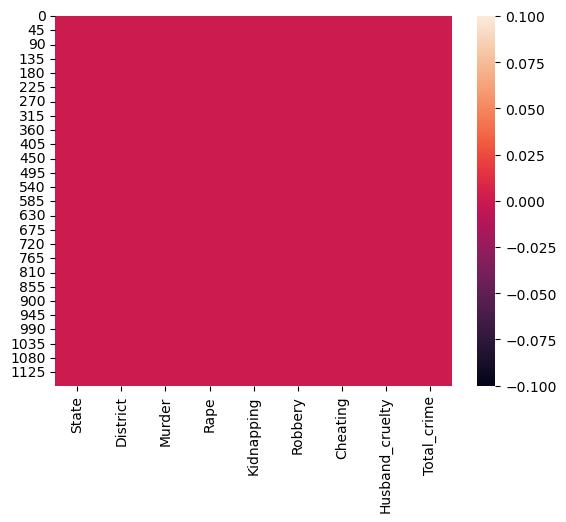

In [29]:
# Checking heatmap for null values

sns.heatmap(df2.isnull())

As per heatmap we can see that there is no null value present in the dataset.

In [31]:
# Checking correlation 

df2.corr()

Murder      Rape  Kidnapping   Robbery  Cheating  \
Murder           1.000000  0.236307    0.308090  0.266727 -0.120914   
Rape             0.236307  1.000000    0.166533  0.211008 -0.124830   
Kidnapping       0.308090  0.166533    1.000000  0.300412 -0.129567   
Robbery          0.266727  0.211008    0.300412  1.000000 -0.111152   
Cheating        -0.120914 -0.124830   -0.129567 -0.111152  1.000000   
Husband_cruelty -0.073869  0.226316    0.124735 -0.032801 -0.053505   
Total_crime      0.418703  0.334336    0.340700  0.334387  0.183996   

                 Husband_cruelty  Total_crime  
Murder                 -0.073869     0.418703  
Rape                    0.226316     0.334336  
Kidnapping              0.124735     0.340700  
Robbery                -0.032801     0.334387  
Cheating               -0.053505     0.183996  
Husband_cruelty         1.000000     0.182428  
Total_crime             0.182428     1.000000

<AxesSubplot:>

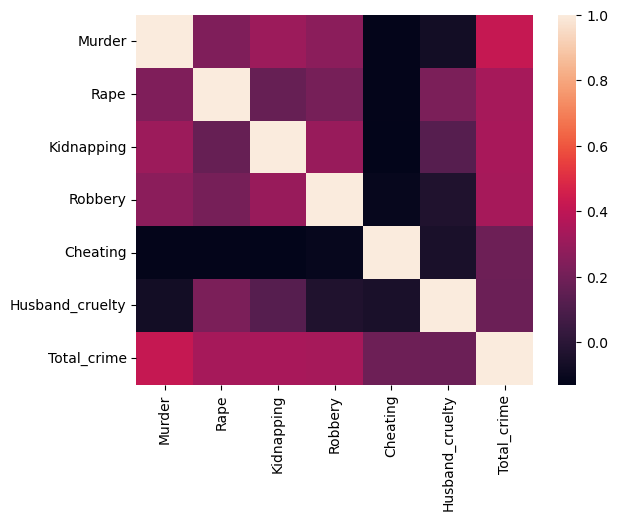

In [32]:
# heatmap for correlation

sns.heatmap(df2.corr())

# Data Visualization

<AxesSubplot:xlabel='Murder', ylabel='count'>

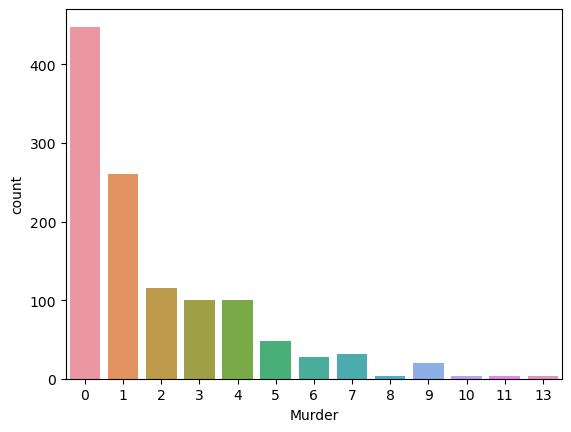

In [33]:
sns.countplot(df2['Murder'])

as per above plot we can see that point 0 has the highest in all the points.

<AxesSubplot:xlabel='Rape', ylabel='Count'>

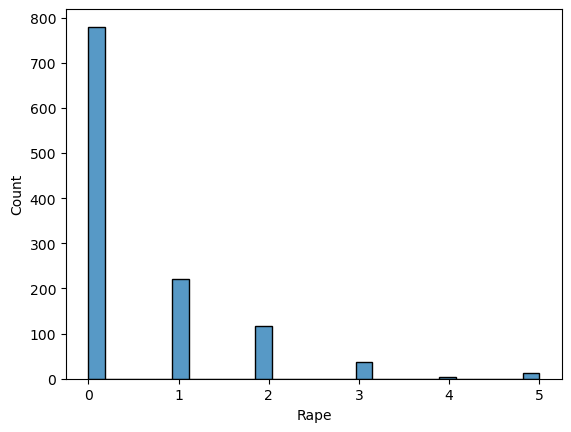

In [34]:
sns.histplot(df2['Rape'])

As per above plot we can see that in Rape coluumn point 0 has the highest value.

<AxesSubplot:xlabel='Kidnapping'>

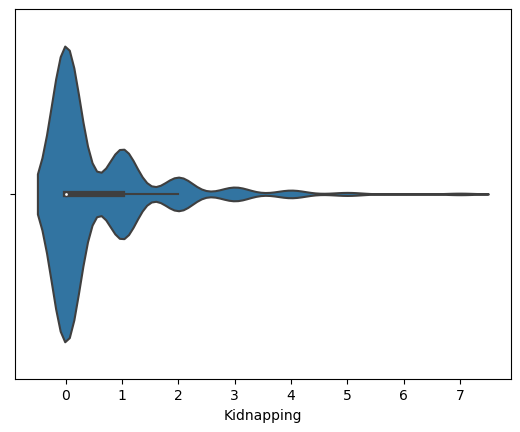

In [35]:
sns.violinplot(df2['Kidnapping'])

For the kidnapping plot maximum value is in between 0 and 1.

<AxesSubplot:xlabel='Robbery', ylabel='count'>

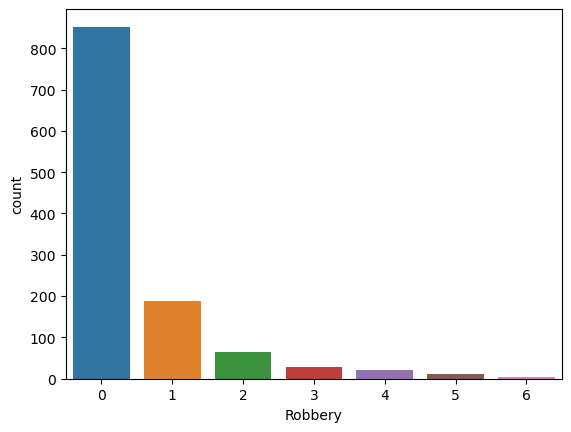

In [38]:
sns.countplot(df2['Robbery'])

in the above plot robbery is highest at point 0 and lowest as point 6.

<AxesSubplot:xlabel='Cheating', ylabel='Count'>

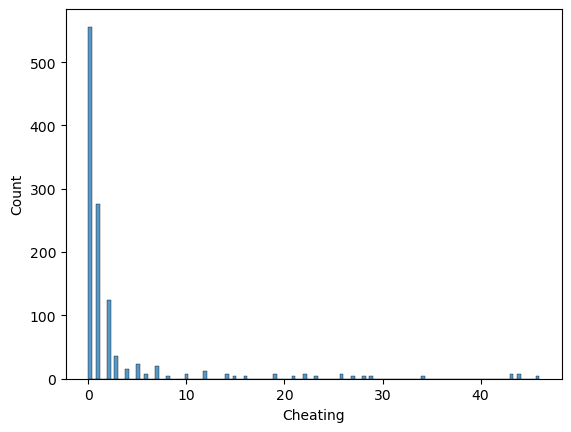

In [39]:
sns.histplot(df2['Cheating'])

For Cheating plot point 0 is highest and point 40 is lowest.

<AxesSubplot:xlabel='Husband_cruelty', ylabel='Density'>

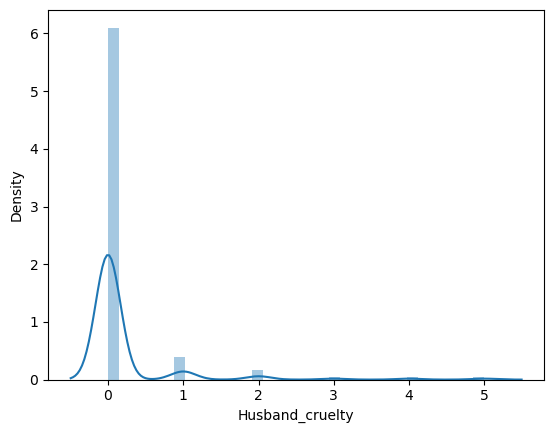

In [40]:
sns.distplot(df2['Husband_cruelty'])

In the husband cruelty plot we see that it is higher at point 0.

<AxesSubplot:xlabel='Total_crime', ylabel='count'>

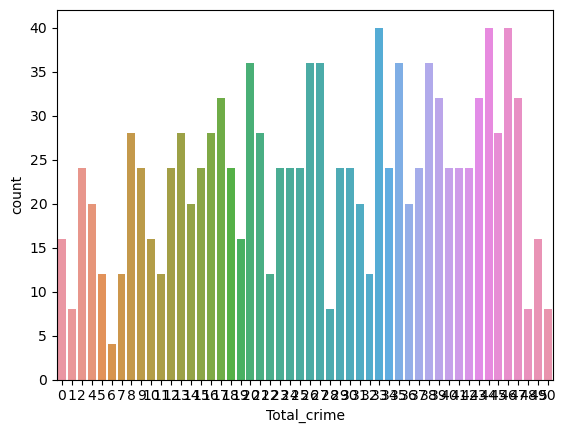

In [42]:
sns.countplot(df2['Total_crime'])

In the Total Crime plot we have values for all the state and district .

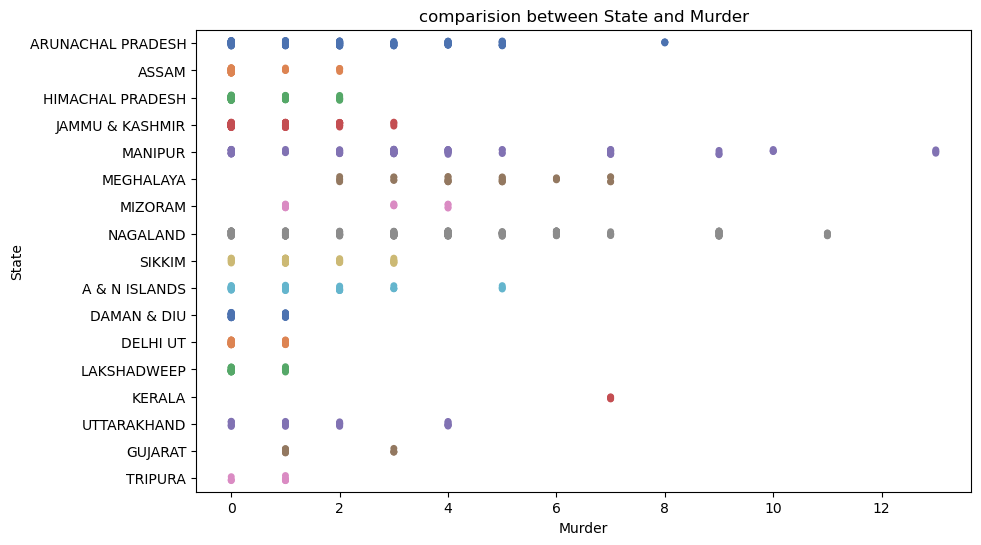

In [43]:
# comparision between State and Murder

plt.figure(figsize=(10,6))
plt.title('comparision between State and Murder')
sns.stripplot(x='Murder',y='State',data=df2,palette='deep')
plt.show()

In the above plot Tripura has the lowest number of Murders.

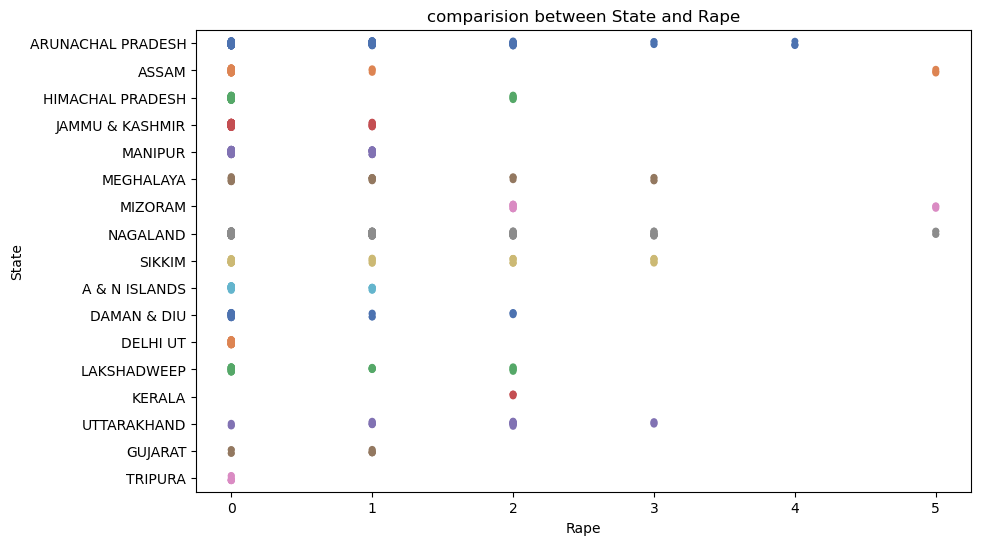

In [46]:
# comparision between State and Rape

plt.figure(figsize=(10,6))
plt.title('comparision between State and Rape')
sns.stripplot(x='Rape',y='State',data=df2,palette='deep')
plt.show()

In this plot Tripura and Kerela has lowest in Rape crime

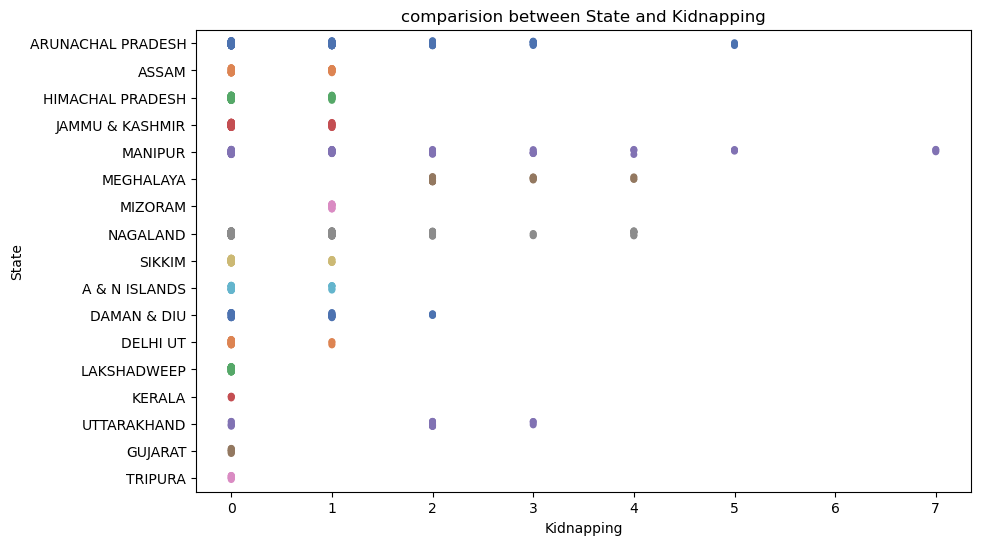

In [47]:
# comparision between State and Kidnapping

plt.figure(figsize=(10,6))
plt.title('comparision between State and Kidnapping')
sns.stripplot(x='Kidnapping',y='State',data=df2,palette='deep')
plt.show()

In the above plot we can see that Tripura , Gujarat and Kerela has the lowest in Kidnapping Case.

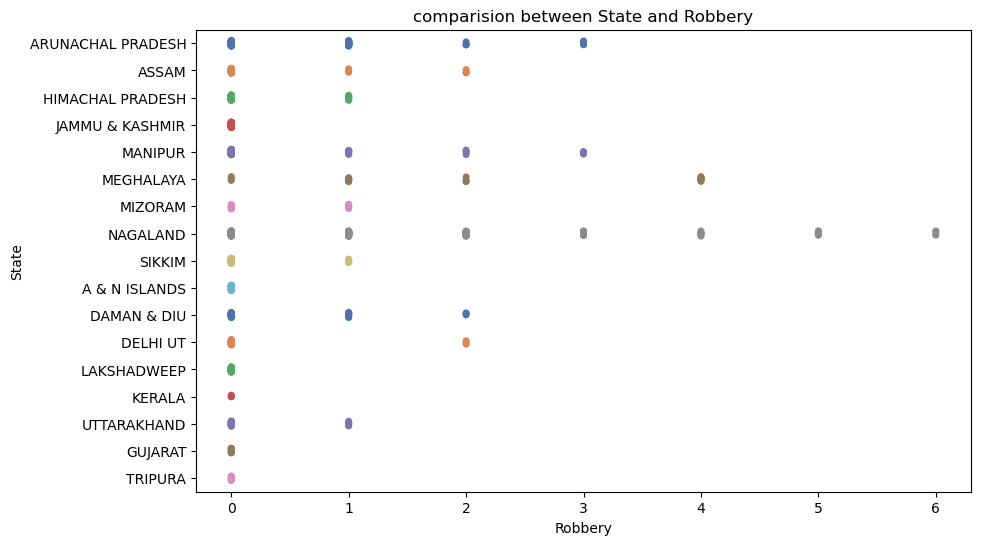

In [48]:
# comparision between State and Robbery

plt.figure(figsize=(10,6))
plt.title('comparision between State and Robbery')
sns.stripplot(x='Robbery',y='State',data=df2,palette='deep')
plt.show()

The above plot shows that count of Robbery case is very in Tripura ,Gujarat ,Kerela , Jammu and Kashmir State.

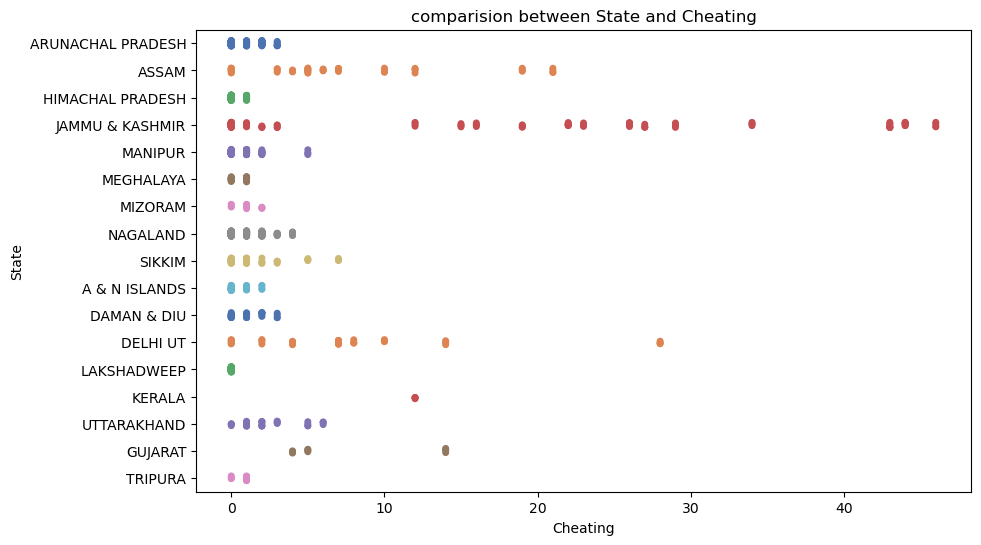

In [49]:
# comparision between State and Cheating

plt.figure(figsize=(10,6))
plt.title('comparision between State and Cheating')
sns.stripplot(x='Cheating',y='State',data=df2,palette='deep')
plt.show()

In the above plot we can see that  Kerela is very low in Cheating case.

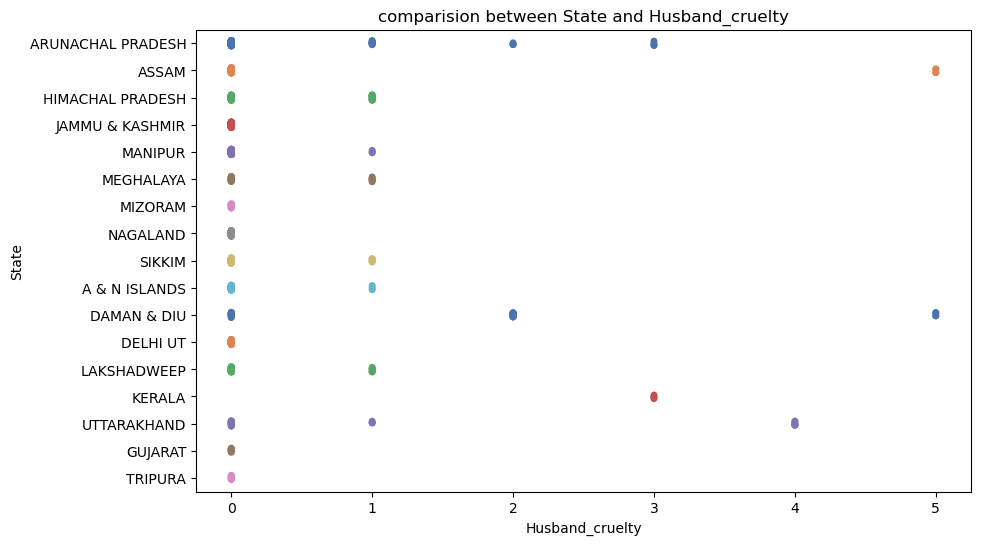

In [50]:
# comparision between State and Husband_cruelty

plt.figure(figsize=(10,6))
plt.title('comparision between State and Husband_cruelty')
sns.stripplot(x='Husband_cruelty',y='State',data=df2,palette='deep')
plt.show()

As per this plot we can see that Tripura , Gujarat , Assam , Kerela has the lowest in Husband_cruelty.

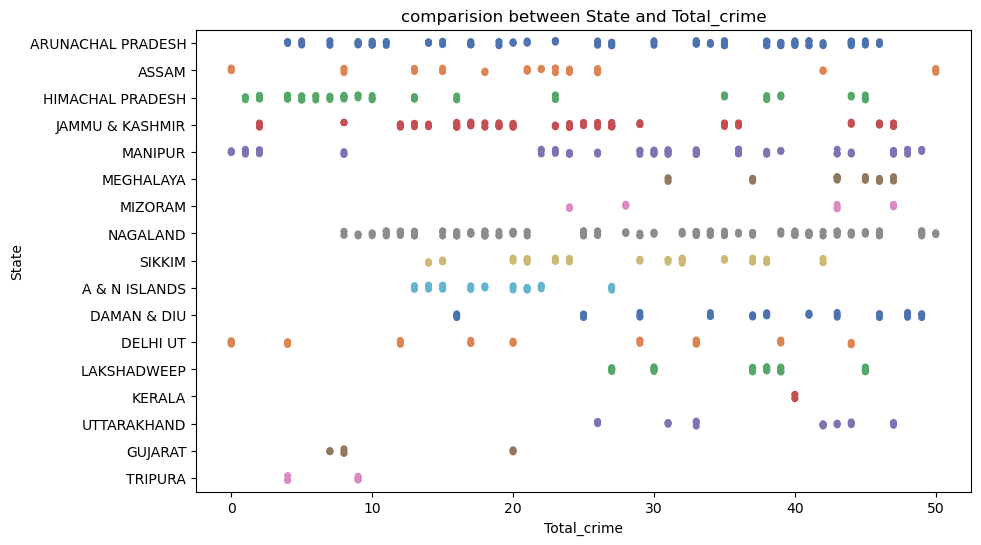

In [51]:
# comparision between State and Total_crime

plt.figure(figsize=(10,6))
plt.title('comparision between State and Total_crime')
sns.stripplot(x='Total_crime',y='State',data=df2,palette='deep')
plt.show()

In the above plot we can see that Tripura has the lowest in Total_crime.

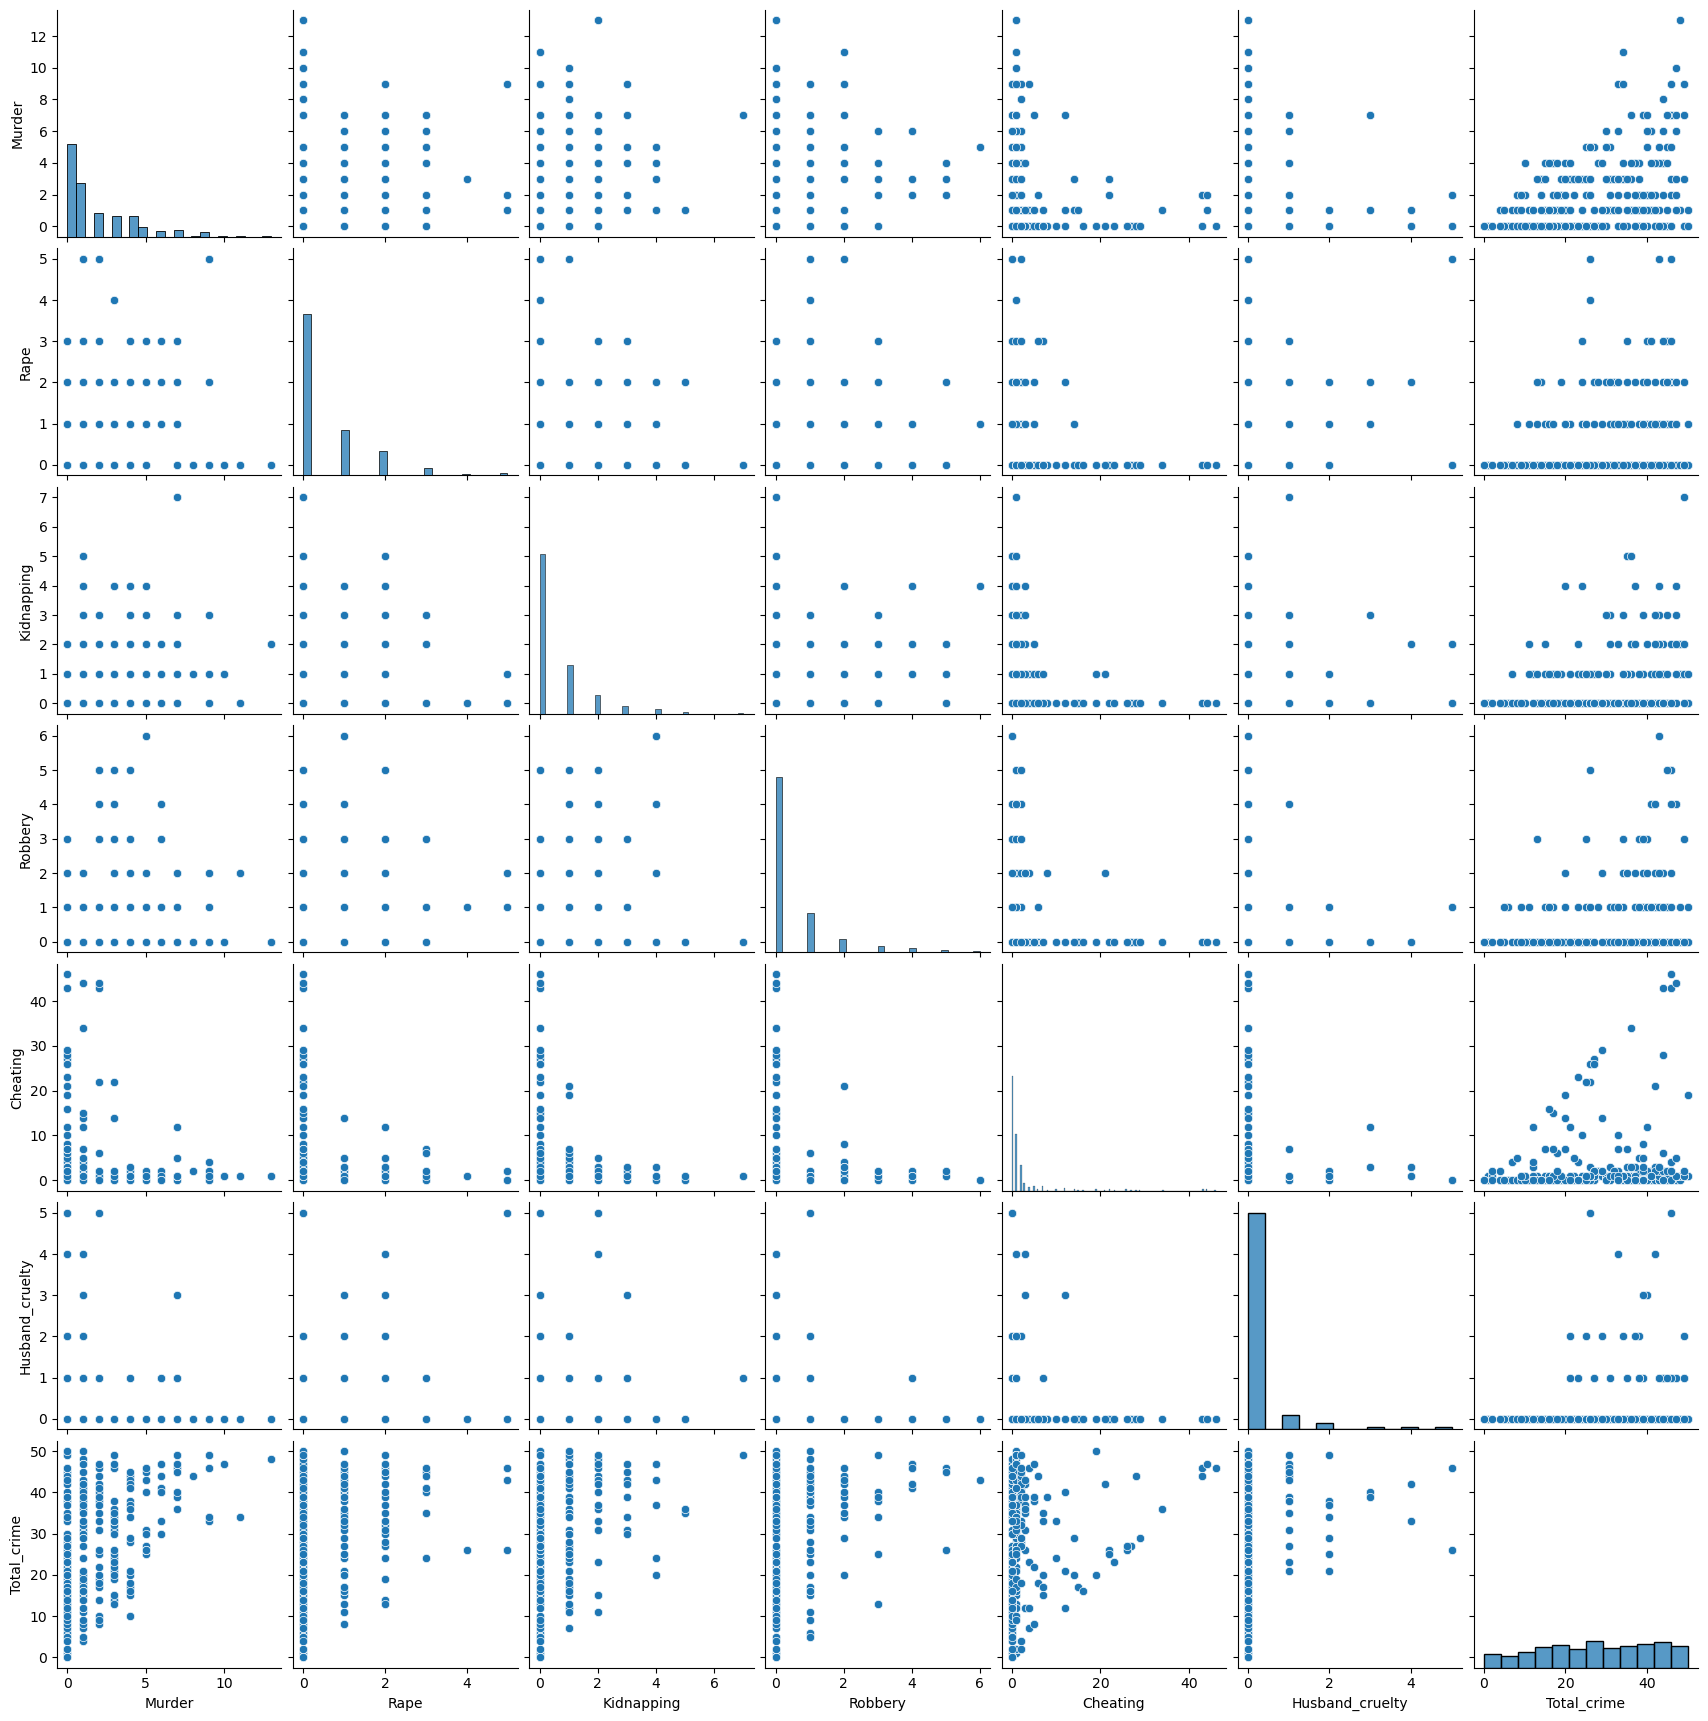

In [53]:
sns.pairplot(data=df2)

Its pairwise presentation of all the columns.

Its also show the relationship between the columns.

# Checking outlier for Peaceful Area

Murder                AxesSubplot(0.125,0.53;0.110714x0.35)
Rape               AxesSubplot(0.257857,0.53;0.110714x0.35)
Kidnapping         AxesSubplot(0.390714,0.53;0.110714x0.35)
Robbery            AxesSubplot(0.523571,0.53;0.110714x0.35)
Cheating           AxesSubplot(0.656429,0.53;0.110714x0.35)
Husband_cruelty    AxesSubplot(0.789286,0.53;0.110714x0.35)
Total_crime           AxesSubplot(0.125,0.11;0.110714x0.35)
dtype: object

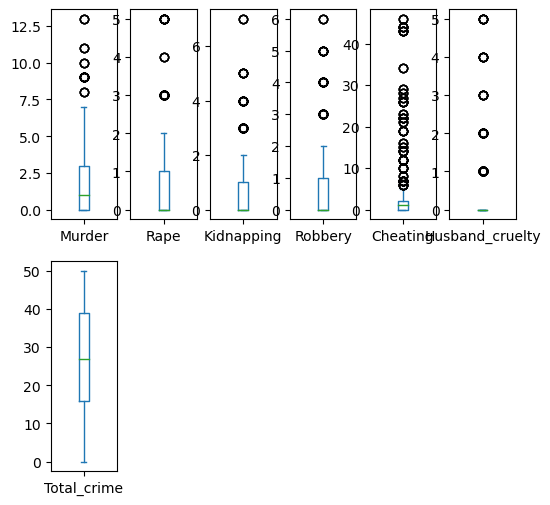

In [55]:
df2.plot(kind='box' , subplots=True , layout=(2,6) , figsize=(6,6))

As per above plot we can see that there is outliers present in the dataset and we need to remove it.

In [57]:
# finding limits

upper_limits = df2['Cheating'].mean() + 3*df2['Cheating'].std()
lower_limits = df2['Cheating'].mean() - 3*df2['Cheating'].std()

In [58]:
print('upper_limits' ,upper_limits)
print('lower_limits',lower_limits)

upper_limits 25.86001667304524
lower_limits -19.76412626208634


In [59]:
# finding outlier

df2.loc[(df2['Cheating'] > upper_limits) | (df2['Cheating'] < lower_limits)]

State        District  Murder  Rape  Kidnapping  Robbery  \
5     JAMMU & KASHMIR     CRIME JAMMU       0     0           0        0   
27    JAMMU & KASHMIR     CRIME JAMMU       1     0           0        0   
39           DELHI UT        SPL CELL       0     0           0        0   
50    JAMMU & KASHMIR     CRIME JAMMU       1     0           0        0   
90    JAMMU & KASHMIR     CRIME JAMMU       2     0           0        0   
113   JAMMU & KASHMIR  CRIME SRINAGAR       0     0           0        0   
131   JAMMU & KASHMIR     CRIME JAMMU       0     0           0        0   
152   JAMMU & KASHMIR  CRIME SRINAGAR       2     0           0        0   
178   JAMMU & KASHMIR  CRIME SRINAGAR       0     0           0        0   
208   JAMMU & KASHMIR   CRIME KASHMIR       0     0           0        0   
274   JAMMU & KASHMIR  CRIME SRINAGAR       0     0           0        0   
297   JAMMU & KASHMIR     CRIME JAMMU       0     0           0        0   
319   JAMMU & KASHMIR     CRIME JAMMU       1     0           0        0   
331          DELHI UT        SPL CELL       0     0           0        0   
342   JAMMU & KASHMIR     CRIME JAMMU       1     0           0        0   
382   JAMMU & KASHMIR     CRIME JAMMU       2     0           0        0   
405   JAMMU & KASHMIR  CRIME SRINAGAR       0     0           0        0   
423   JAMMU & KASHMIR     CRIME JAMMU       0     0           0        0   
444   JAMMU & KASHMIR  CRIME SRINAGAR       2     0           0        0   
470   JAMMU & KASHMIR  CRIME SRINAGAR       0     0           0        0   
500   JAMMU & KASHMIR   CRIME KASHMIR       0     0           0        0   
566   JAMMU & KASHMIR  CRIME SRINAGAR       0     0           0        0   
589   JAMMU & KASHMIR     CRIME JAMMU       0     0           0        0   
611   JAMMU & KASHMIR     CRIME JAMMU       1     0           0        0   
623          DELHI UT        SPL CELL       0     0           0        0   
634   JAMMU & KASHMIR     CRIME JAMMU       1     0           0        0   
674   JAMMU & KASHMIR     CRIME JAMMU       2     0           0        0   
697   JAMMU & KASHMIR  CRIME SRINAGAR       0     0           0        0   
715   JAMMU & KASHMIR     CRIME JAMMU       0     0           0        0   
736   JAMMU & KASHMIR  CRIME SRINAGAR       2     0           0        0   
762   JAMMU & KASHMIR  CRIME SRINAGAR       0     0           0        0   
792   JAMMU & KASHMIR   CRIME KASHMIR       0     0           0        0   
858   JAMMU & KASHMIR  CRIME SRINAGAR       0     0           0        0   
881   JAMMU & KASHMIR     CRIME JAMMU       0     0           0        0   
903   JAMMU & KASHMIR     CRIME JAMMU       1     0           0        0   
915          DELHI UT        SPL CELL       0     0           0        0   
926   JAMMU & KASHMIR     CRIME JAMMU       1     0           0        0   
966   JAMMU & KASHMIR     CRIME JAMMU       2     0           0        0   
989   JAMMU & KASHMIR  CRIME SRINAGAR       0     0           0        0   
1007  JAMMU & KASHMIR     CRIME JAMMU       0     0           0        0   
1028  JAMMU & KASHMIR  CRIME SRINAGAR       2     0           0        0   
1054  JAMMU & KASHMIR  CRIME SRINAGAR       0     0           0        0   
1084  JAMMU & KASHMIR   CRIME KASHMIR       0     0           0        0   
1150  JAMMU & KASHMIR  CRIME SRINAGAR       0     0           0        0   

      Cheating  Husband_cruelty  Total_crime  
5           27                0           27  
27          44                0           47  
39          28                0           44  
50          34                0           36  
90          43                0           46  
113         46                0           46  
131         43                0           44  
152         44                0           47  
178         26                0           26  
208         29                0           29  
274         26                0           27  
297         27                0

In [60]:
# trimming - delete the outliers

new_df2 = df2.loc[(df2['Cheating'] < upper_limits ) & (df2['Cheating'] > lower_limits)]

In [62]:
# checking lenght of dataset after removing outliers
print(len(df2))
print(len(new_df2))

1168
1124


In [63]:
# capping - change outlier value to upper or lower limit values

new_df2 = df2.copy()
new_df2.loc[(new_df2['Cheating'] > upper_limits) , 'Cheating'] = upper_limits
new_df2.loc[(new_df2['Cheating'] < lower_limits) , 'Cheating'] = lower_limits

In [64]:
print(len(new_df2))

1168


In [65]:
df2 = new_df2

# Unsupervised Learning

Now we will do Unsupervised Learning on dataset as we have only x value .

In [66]:
df2

State      District  Murder  Rape  Kidnapping  Robbery  \
0     ARUNACHAL PRADESH   SIANG UPPER       1     2           5        0   
1     ARUNACHAL PRADESH        TAWANG       2     1           0        0   
2                 ASSAM        C.I.D.       0     0           0        0   
3      HIMACHAL PRADESH        G.R.P.       1     0           0        0   
4      HIMACHAL PRADESH  LAHAUL-SPITI       1     2           1        1   
...                 ...           ...     ...   ...         ...      ...   
1163        UTTARAKHAND       CHAMOLI       1     2           2        0   
1164        UTTARAKHAND     CHAMPAWAT       2     3           0        1   
1165      A & N ISLANDS           CAR       2     0           1        0   
1166        DAMAN & DIU           DIU       0     0           1        0   
1167           DELHI UT           STF       0     0           0        0   

      Cheating  Husband_cruelty  Total_crime  
0          0.0                0           35  
1          1.0                0           40  
2          5.0                0            8  
3          0.0                0            4  
4          1.0                1           39  
...        ...              ...          ...  
1163       5.0                0           47  
1164       6.0                0           44  
1165       2.0                0           18  
1166       1.0                2           25  
1167       2.0                0            4  

[1168 rows x 9 columns]

In [68]:
# getting x values

x = df2.iloc[:,3:]
x.tail(3)

Rape  Kidnapping  Robbery  Cheating  Husband_cruelty  Total_crime
1165     0           1        0       2.0                0           18
1166     0           1        0       1.0                2           25
1167     0           0        0       2.0                0            4

In [69]:
# Use of Elbow Method 

from sklearn.cluster import KMeans

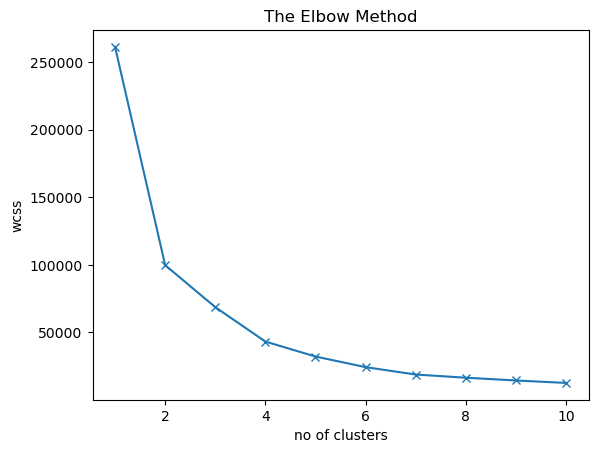

In [70]:
wcss=[]
for i in range(1,11):
    km=KMeans(n_clusters=i,init='k-means++')
    km.fit(x)
    wcss.append(km.inertia_)
    
plt.plot(range(1,11) ,wcss , marker='x')
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show()

In [71]:
# fitting k_means to dataset

km = KMeans(n_clusters=5 , init='k-means++')
y_km = km.fit_predict(x)
print(y_km)

[0 2 1 ... 4 0 1]


In [72]:
km.labels_

array([0, 2, 1, ..., 4, 0, 1])

In [73]:
# clusters center

km.cluster_centers_

array([[ 7.67123288e-01,  6.71232877e-01,  4.79452055e-01,
         1.09589041e+00,  2.73972603e-01,  3.03013699e+01],
       [ 4.54545455e-02,  1.13636364e-01,  9.09090909e-02,
         6.36363636e-01, -2.77555756e-17,  5.88636364e+00],
       [ 9.88095238e-01,  1.04761905e+00,  1.04761905e+00,
         1.36904762e+00,  3.69047619e-01,  4.25595238e+01],
       [ 1.11022302e-16,  1.11111111e-01,  1.11111111e-01,
         2.35811213e+01,  0.00000000e+00,  3.52222222e+01],
       [ 2.46575342e-01,  3.15068493e-01,  1.64383562e-01,
         1.87671233e+00,  5.47945205e-02,  1.73561644e+01]])

In [75]:
# cluster0

x[y_km==0].head(3)

Rape  Kidnapping  Robbery  Cheating  Husband_cruelty  Total_crime
0      2           5        0       0.0                0           35
13     0           0        1       1.0                0           28
16     0           0        0       3.0                0           31

In [76]:
# cluster 1

x[y_km==1].head(3)

Rape  Kidnapping  Robbery  Cheating  Husband_cruelty  Total_crime
2     0           0        0       5.0                0            8
3     0           0        0       0.0                0            4
7     0           0        0       0.0                0            8

In [77]:
# cluster 2

x[y_km==2].head(3)

Rape  Kidnapping  Robbery  Cheating  Husband_cruelty  Total_crime
1     1           0        0       1.0                0           40
4     2           1        1       1.0                1           39
8     0           1        3       0.0                0           38

As per above we can see that cluster 1 has lowest in Total_crime.

In [155]:
# now we need to add column to show which row belongs to which group.

df2['group cluster']=pd.DataFrame(data=km.labels_)
df2

State      District  Murder  Rape  Kidnapping  Robbery  \
0     ARUNACHAL PRADESH   SIANG UPPER       1     2           5        0   
1     ARUNACHAL PRADESH        TAWANG       2     1           0        0   
2                 ASSAM        C.I.D.       0     0           0        0   
3      HIMACHAL PRADESH        G.R.P.       1     0           0        0   
4      HIMACHAL PRADESH  LAHAUL-SPITI       1     2           1        1   
...                 ...           ...     ...   ...         ...      ...   
1163        UTTARAKHAND       CHAMOLI       1     2           2        0   
1164        UTTARAKHAND     CHAMPAWAT       2     3           0        1   
1165      A & N ISLANDS           CAR       2     0           1        0   
1166        DAMAN & DIU           DIU       0     0           1        0   
1167           DELHI UT           STF       0     0           0        0   

      Cheating  Husband_cruelty  Total_crime  group cluster  
0          0.0                0           35              4  
1          1.0                0           40              4  
2          5.0                0            8              4  
3          0.0                0            4              1  
4          1.0                1           39              3  
...        ...              ...          ...            ...  
1163       5.0                0           47              3  
1164       6.0                0           44              1  
1165       2.0                0           18              1  
1166       1.0                2           25              1  
1167       2.0                0            4              2  

[1168 rows x 10 columns]

In [156]:
# now saving this file into csv format

df2.to_csv('PeacefulArea.csv',index=False)

In [157]:
# reloading the csv file

mydf2 = pd.read_csv('PeacefulArea.csv')
mydf2

State      District  Murder  Rape  Kidnapping  Robbery  \
0     ARUNACHAL PRADESH   SIANG UPPER       1     2           5        0   
1     ARUNACHAL PRADESH        TAWANG       2     1           0        0   
2                 ASSAM        C.I.D.       0     0           0        0   
3      HIMACHAL PRADESH        G.R.P.       1     0           0        0   
4      HIMACHAL PRADESH  LAHAUL-SPITI       1     2           1        1   
...                 ...           ...     ...   ...         ...      ...   
1163        UTTARAKHAND       CHAMOLI       1     2           2        0   
1164        UTTARAKHAND     CHAMPAWAT       2     3           0        1   
1165      A & N ISLANDS           CAR       2     0           1        0   
1166        DAMAN & DIU           DIU       0     0           1        0   
1167           DELHI UT           STF       0     0           0        0   

      Cheating  Husband_cruelty  Total_crime  group cluster  
0          0.0                0           35              4  
1          1.0                0           40              4  
2          5.0                0            8              4  
3          0.0                0            4              1  
4          1.0                1           39              3  
...        ...              ...          ...            ...  
1163       5.0                0           47              3  
1164       6.0                0           44              1  
1165       2.0                0           18              1  
1166       1.0                2           25              1  
1167       2.0                0            4              2  

[1168 rows x 10 columns]

Here the Unsupervised Clustering is done for Peaceful Area.

# Observation Report

Here We have project about Crime report of India . In which we need to find various types of Crime happen in over India , State and District wise .
In above report we have all types of crime done in allover India here we see different types of crime like Murder , Rape , Kidnapping , Robbery , Cheating , Husband_cruelty.
In this we have divided the crime report in 3 different Clusters.


1. Sensitive Area :::

As per the above observation we can see that Uttar Pradesh is higher in Murder , Kidnapping  . Similarly , Rajasthan is higher in Cheating . Assam and Haryana is higher in Husband_cruelty . We also observe that for Total_crime Rate Uttar Pradesh is on top . From above we can also see there is outlier present in the dataset and we have used upper limit and lower limit method to remove the outliers , then we applied Unsupervised Learning on dataset using KMean method as the dataset contain only x values. 

2 . Moderate Area :::

As per the above observation for Moderate Area we can see that Uttar Pradesh is highest for Murder and kidnapping . Punjab is higher for Cheating Cases and Assam is higher in Husband_cruelty . We also see that Uttar Pradesh is also higher in Total_crime for Moderate Area. From the above we can also see that Moderate Area Dataset has outlier present in that and we removed using upperlimit and lower limit method , then we applied Unsupervised learning on dataset using Kmean method as this dataset also has only x value only. 

3. Peaceful Area :::

As per above observation for Peaceful Area we can see that Tripura is Lowest in Murder , Rape , Kidnapping ,Robbery ,Husband_cruelty  and there are few more states which has very low in the crime rate .We can also see that from all over crime Rate Tripura is the lowest in all the crime. Here we also see that there was outlier present in this dataset and we removed it using upperlimit and lower limit and then we used Unsupervied learning on dataset using KMean clustering method as we have only x values.

With all the observation from above plot we can see that Tripura has the lowest in the crime and UttarPradesh has the highest in Crime .